In [2]:
import utils.mining_data_tb as mnd
import utils.folders_tb as fdb
import utils.prediction_calculations as pc
import utils.visualization_tb as vt
import pandas_datareader.data as web 


from datetime import date
import datetime
import pandas as pd

# Initalizing variables
For simplicity of the code, all the main variables needed will be declared in advance, to create a more iterative program, helping to scale in case some new index or market wants to be included or evaluated in this system

In [3]:

study_keys = ["divisas", "IBEX35","DOW_JONES","NASDAQ","UKX","DAX","CAC"]

divisas = pd.DataFrame()
IBEX35 = pd.DataFrame()
DOW_JONES = pd.DataFrame()
NASDAQ = pd.DataFrame()
UKX = pd.DataFrame()
DAX = pd.DataFrame()
CAC = pd.DataFrame()

all_index = {"divisas":divisas,"IBEX35":IBEX35,"DOW_JONES":DOW_JONES,"NASDAQ":NASDAQ,"UKX":UKX,"DAX":DAX,"CAC":CAC}

divisas_mod = pd.DataFrame()
IBEX35_mod = pd.DataFrame()
DOW_JONES_mod = pd.DataFrame()
NASDAQ_mod = pd.DataFrame()
UKX_mod = pd.DataFrame()
DAX_mod = pd.DataFrame()
CAC_mod = pd.DataFrame()

all_index_mod = {"divisas":divisas_mod,"IBEX35":IBEX35_mod,"DOW_JONES":DOW_JONES_mod,"NASDAQ":NASDAQ_mod,"UKX":UKX_mod,"DAX":DAX_mod,"CAC":CAC_mod}

## Filter of words

In [3]:
reference_words = ["death","catastroph","break","fire","murder","crack","tornado","earth","pandemic", "protest","war","army","attack","terrorism","bomb","flood","disaster","kill","hurricane", "tsunami", "drought", "virus", "protest","bank","conflict","disease", "tornado","snow"]

fdb.saver("reference_words",reference_words)

Succesfully saved:	 reference_words


# Getting the data updated
## Last update of the data
In here we'll show what should be our origin date if required, or better said, the first day not included in the data updated

**NOTE:** Stock Markets doesn't open in weekend, so the data will be updated from Tuesday (with the data of Monday) to Saturday (with the data of Friday)

In [7]:
#List of index to update, in case there is any
index_to_update = mnd.index_to_update(study_keys)

# We will only evaluate the index needed, to save time and process-power
# In here I create a counter for fails in synch, to avoid un-needed loss of time

fails = 0
wiki_fail = 0
if len(index_to_update) > 0:
    print(" THE INDEX TO UPDATE ARE:\n", index_to_update)
    
    for ind in index_to_update:
        # First, update the data and calculate the deviations
        print("\n-------------------------- ",ind," -------------------------------\n")
        if ind == "divisas":
            try:
                all_index[ind] = mnd.updater_badges("divisas")
                currencies_list = all_index[ind].columns
                all_index_mod[ind] = mnd.calculate_deviations(ind, factor = 0.00125)
            except:
                    fails += 1
                    print("failed to update",ind)
                    continue
        else:
            try:                
                all_index[ind] = mnd.updater_index(ind, origin_date = from_date)             
                all_index_mod[ind] = mnd.calculate_deviations(ind)
            except:
                    fails += 1
                    print("failed to update",ind)
                    continue
            
        # Second, create the filter and compare with the previous one, to extract the dates to search in wikipedia
        if ind == "divisas":
            new_dict = mnd.dates_checker(df = all_index_mod[ind], parameters = currencies_list, index = ind)
        else:
            new_dict = mnd.dates_checker(df = all_index_mod[ind],parameters = ['Open', 'High', 'Low', 'Close', 'Volume'], index = ind, filter_deg = 15)
 
        articles_full = fdb.read_df_csv_no_date("full_articles_clean")
        search_keys = articles_full["Search_key"].tolist()
        search_keys = list(set(search_keys))
        dates_dict = mnd.compare_dic_to_list(new_dict,search_keys)
        fdb.saver(ind + "_list_dates",new_dict)
            
        # Third, search the last updates of the articles
        
        for T in dates_dict.keys():
            print("\n~o~o~o~o~o~o~o~o~o~o~o~o~o~o~o~o~o~o~o~o~o~o~\n")            
            if len(dates_dict[T])==0:
                print("\t",T, "key up to date.")
            else:
                try:
                    articles = mnd.wiki_searcher(dates_dict[T],temp = T)
                    full_articles_clean = pd.concat([articles_full,articles], ignore_index= True)
                    full_articles_clean = mnd.clean_wikipedia(full_articles_clean)
                    fdb.save_data_csv_apending("full_articles_clean", articles)
                except:
                    wiki_fail += 1
                    print("failed to update",T)
                    
                    continue
        
    #
    # Updating the 'Super Files'
    #
    if (fails < len(index_to_update)) and (wiki_fail < 3*len(index_to_update)):
        # Updating the dates needed
        print("\n------------------------ SUPER DOCS -----------------------------\n")
        dates_dic = mnd.dates_crossed(study_keys)

        #Executing the merger of all data
        print("\tHot:")
        hot_wiki_df = mnd.super_wiki_articles(study_keys, "hot" ,dates_dic)
        print("\tTempered:")
        temp_wiki_df = mnd.super_wiki_articles(study_keys, "tempered" ,dates_dic)
        print("\tCold:")
        cold_wiki_df = mnd.super_wiki_articles(study_keys, "cold" ,dates_dic)
    else:
        print("\n#################### FAIL IN SYNCHRONIZATION ###################\n")
    
else:
    print("All the indexes are up to date")
    hot_wiki_df = fdb.read_super_temp("Super_hot_Wiki_articles")
    temp_wiki_df = fdb.read_super_temp("Super_tempered_Wiki_articles")
    cold_wiki_df = fdb.read_super_temp("Super_cold_Wiki_articles")
    

 THE INDEX TO UPDATE ARE:
 ['IBEX35', 'CAC']

--------------------------  IBEX35  -------------------------------

failed to update IBEX35

--------------------------  CAC  -------------------------------

failed to update CAC

#################### FAIL IN SYNCHRONIZATION ###################



# Studing the Data
## Correlation and Graphic modules
### In here we will correlate the data and represent it as block

In the case we change the list of words, we'll use this block to update the scores

In [ ]:

dates_dic = mnd.dates_crossed(study_keys)

#Executing the merger of all data
print("\tHot:")
hot_wiki_df = mnd.super_wiki_articles(study_keys, "hot" ,dates_dic)
print("\tTempered:")
temp_wiki_df = mnd.super_wiki_articles(study_keys, "tempered" ,dates_dic)
print("\tCold:")
cold_wiki_df = mnd.super_wiki_articles(study_keys, "cold" ,dates_dic)

This is a full round of generic representation, that will show us a path to follow in the analysis

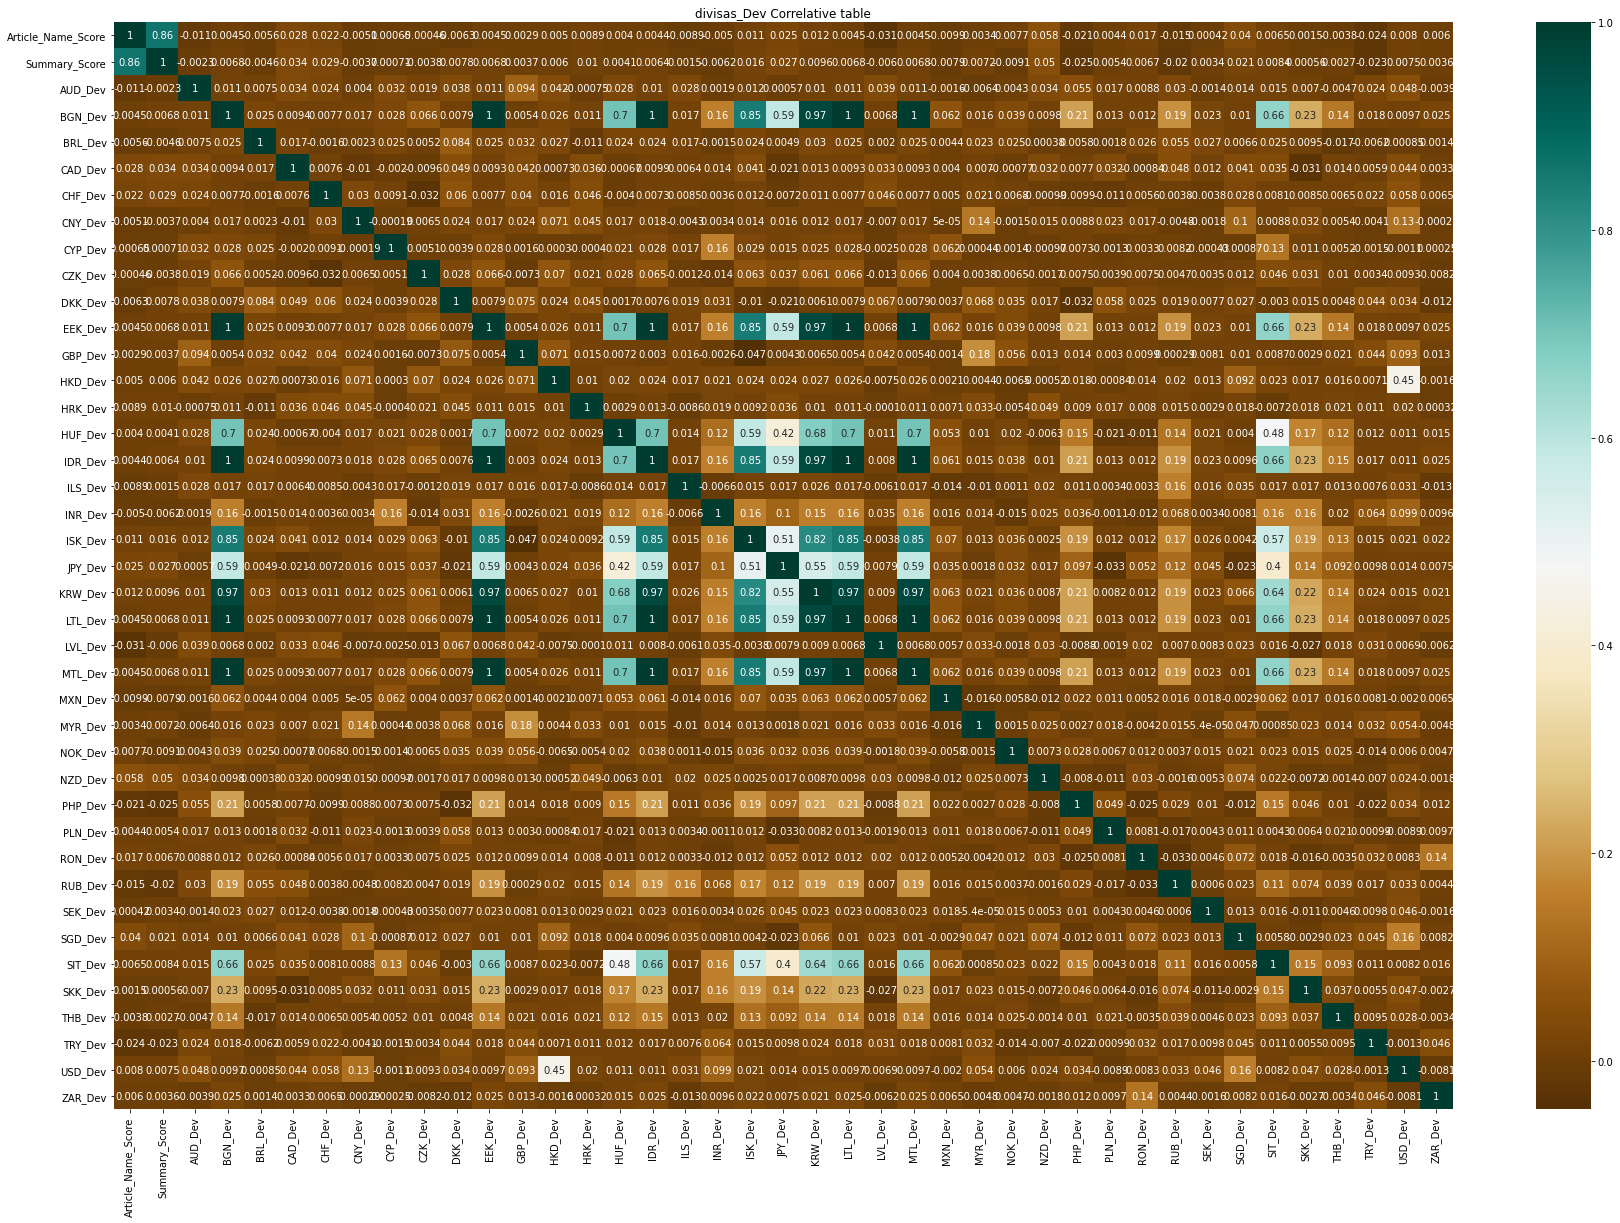

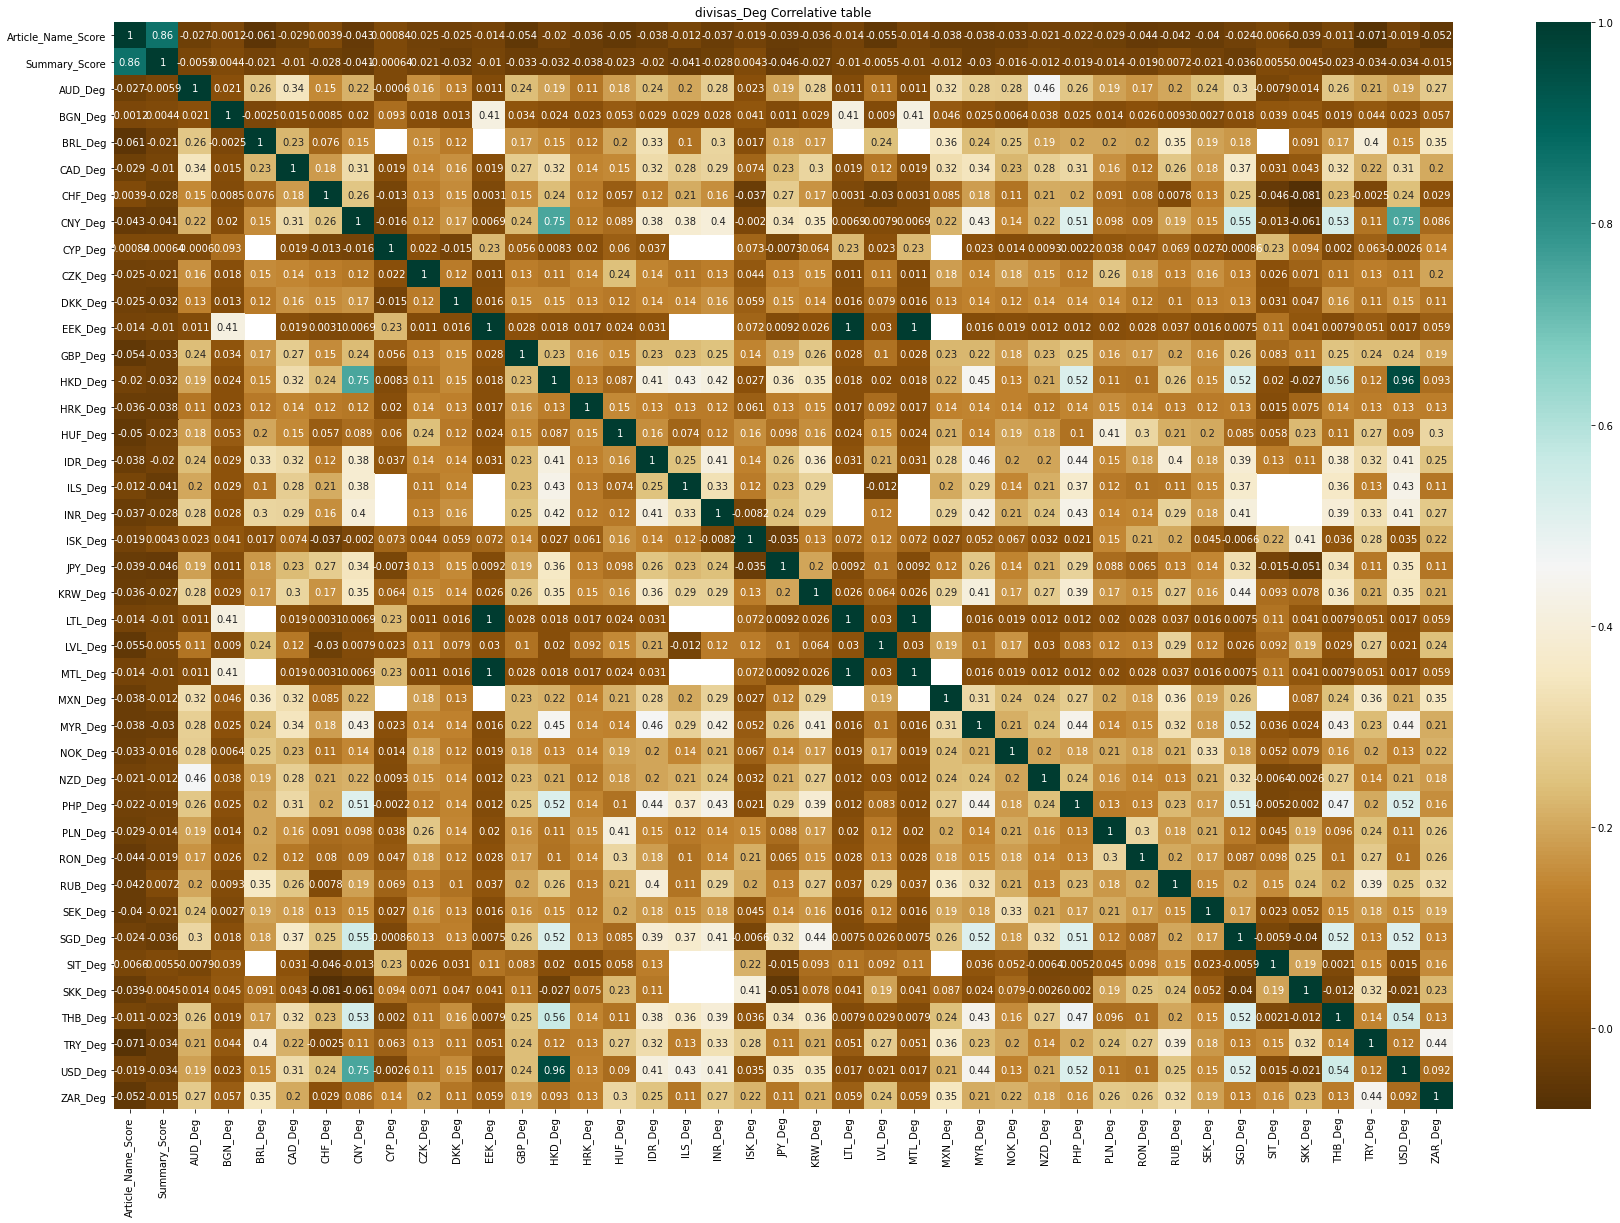

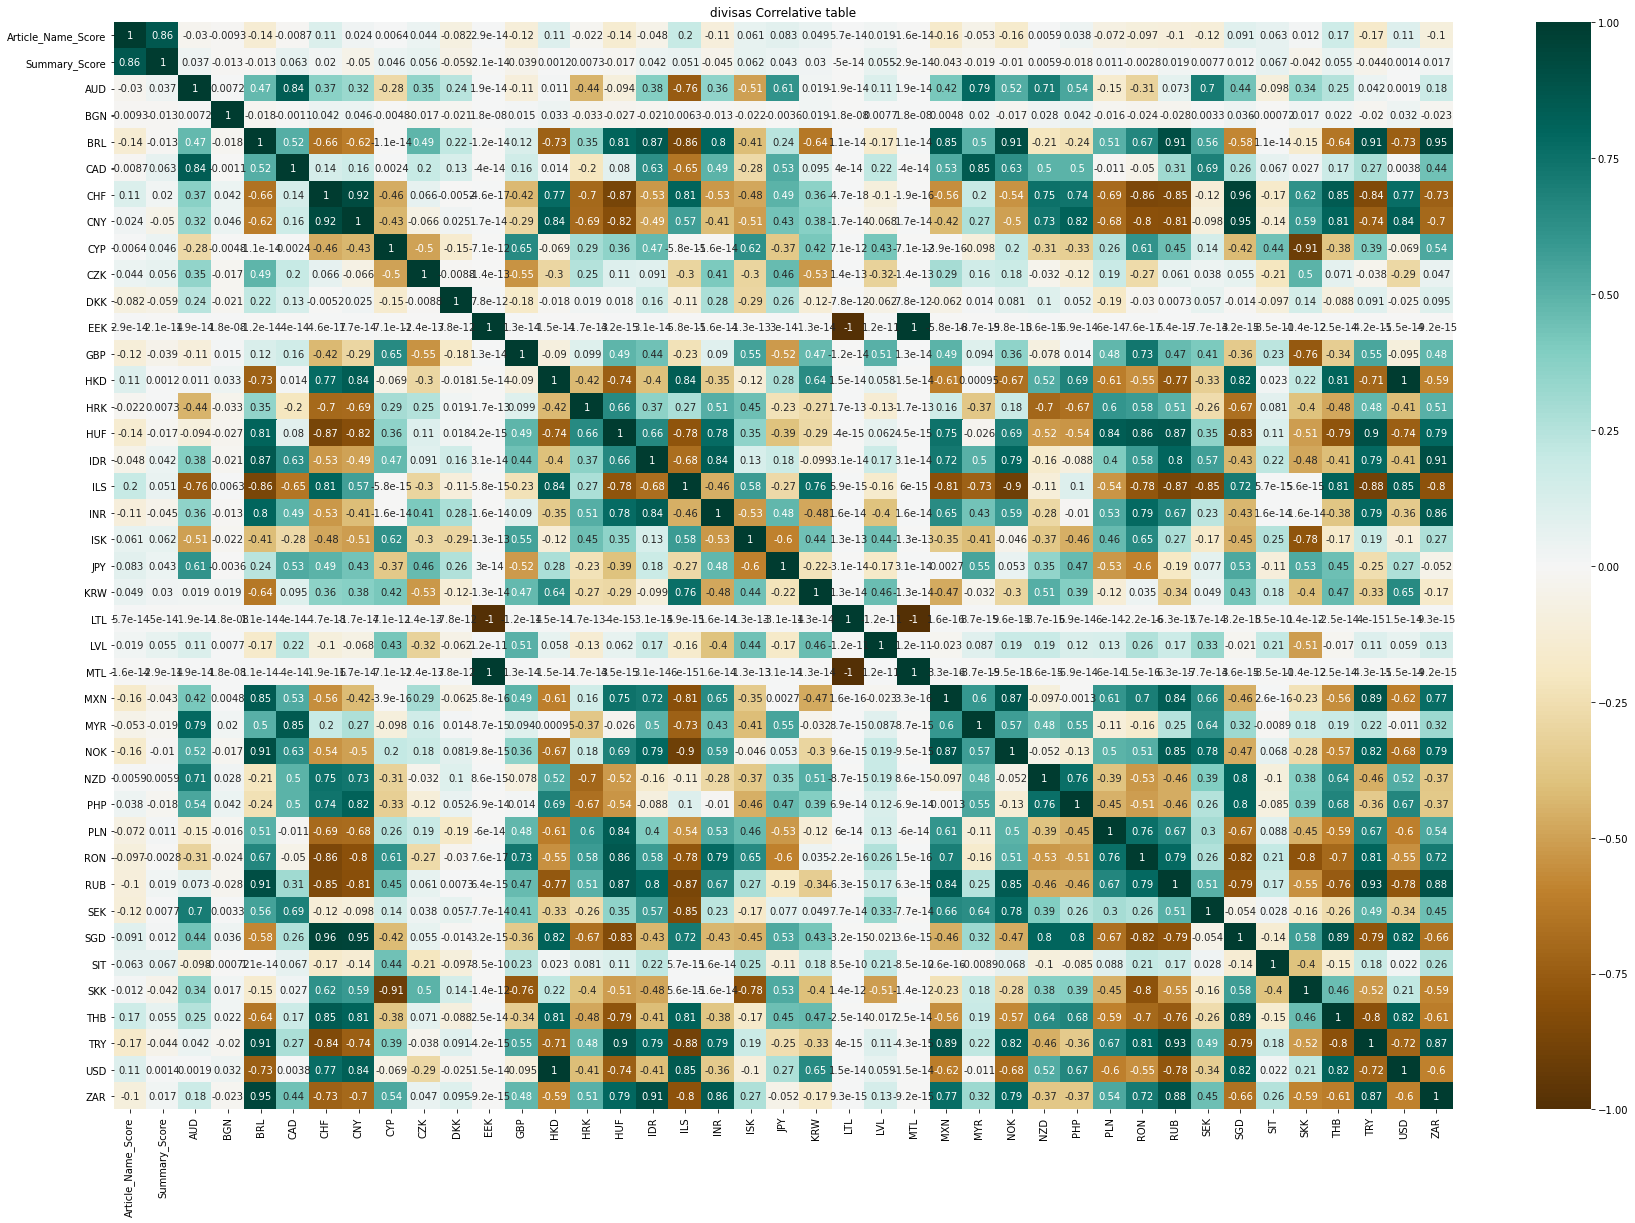

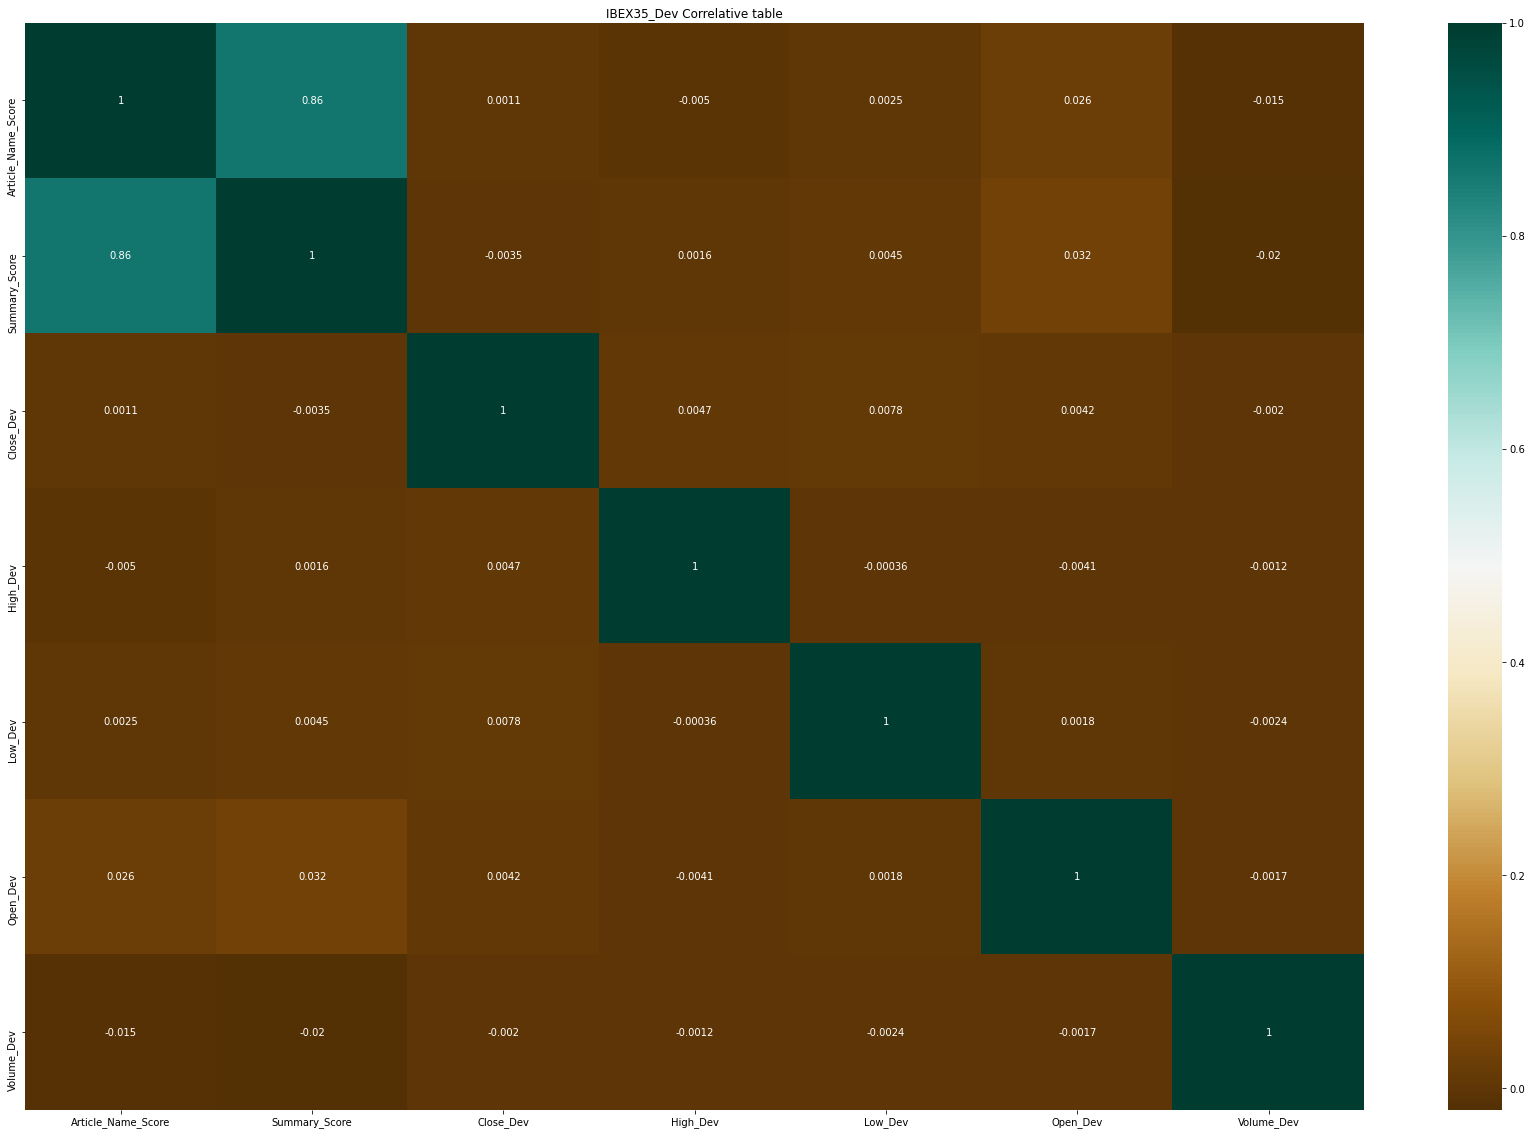

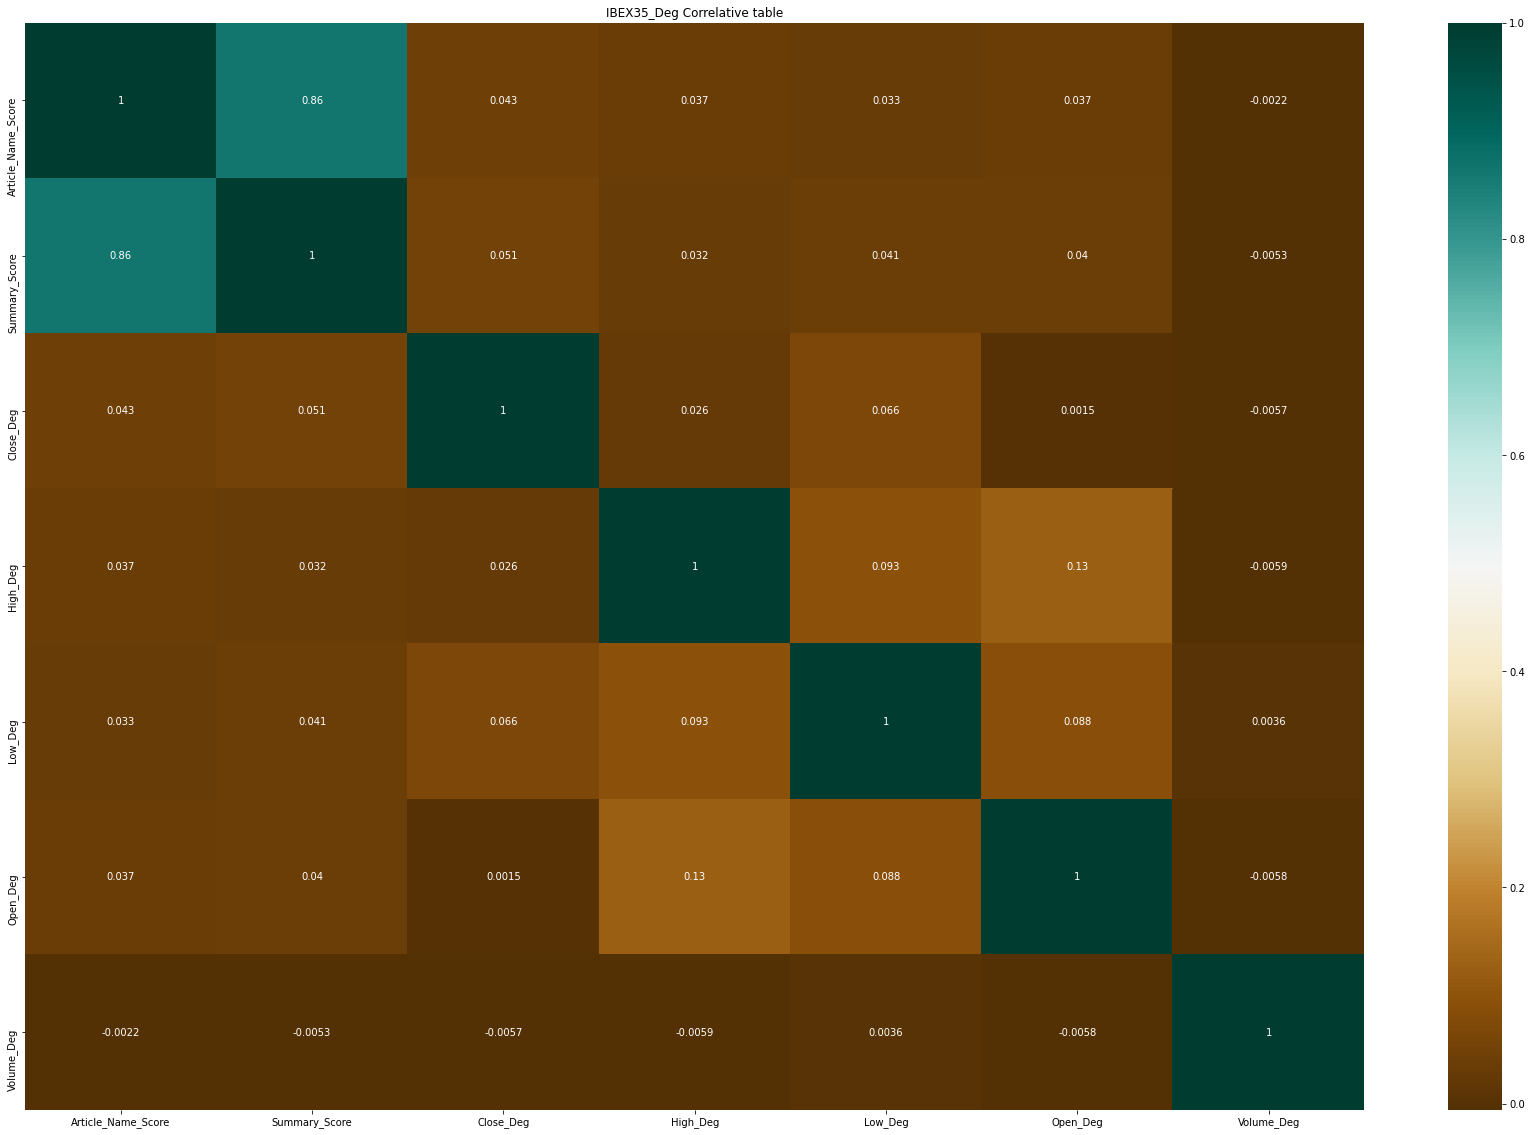

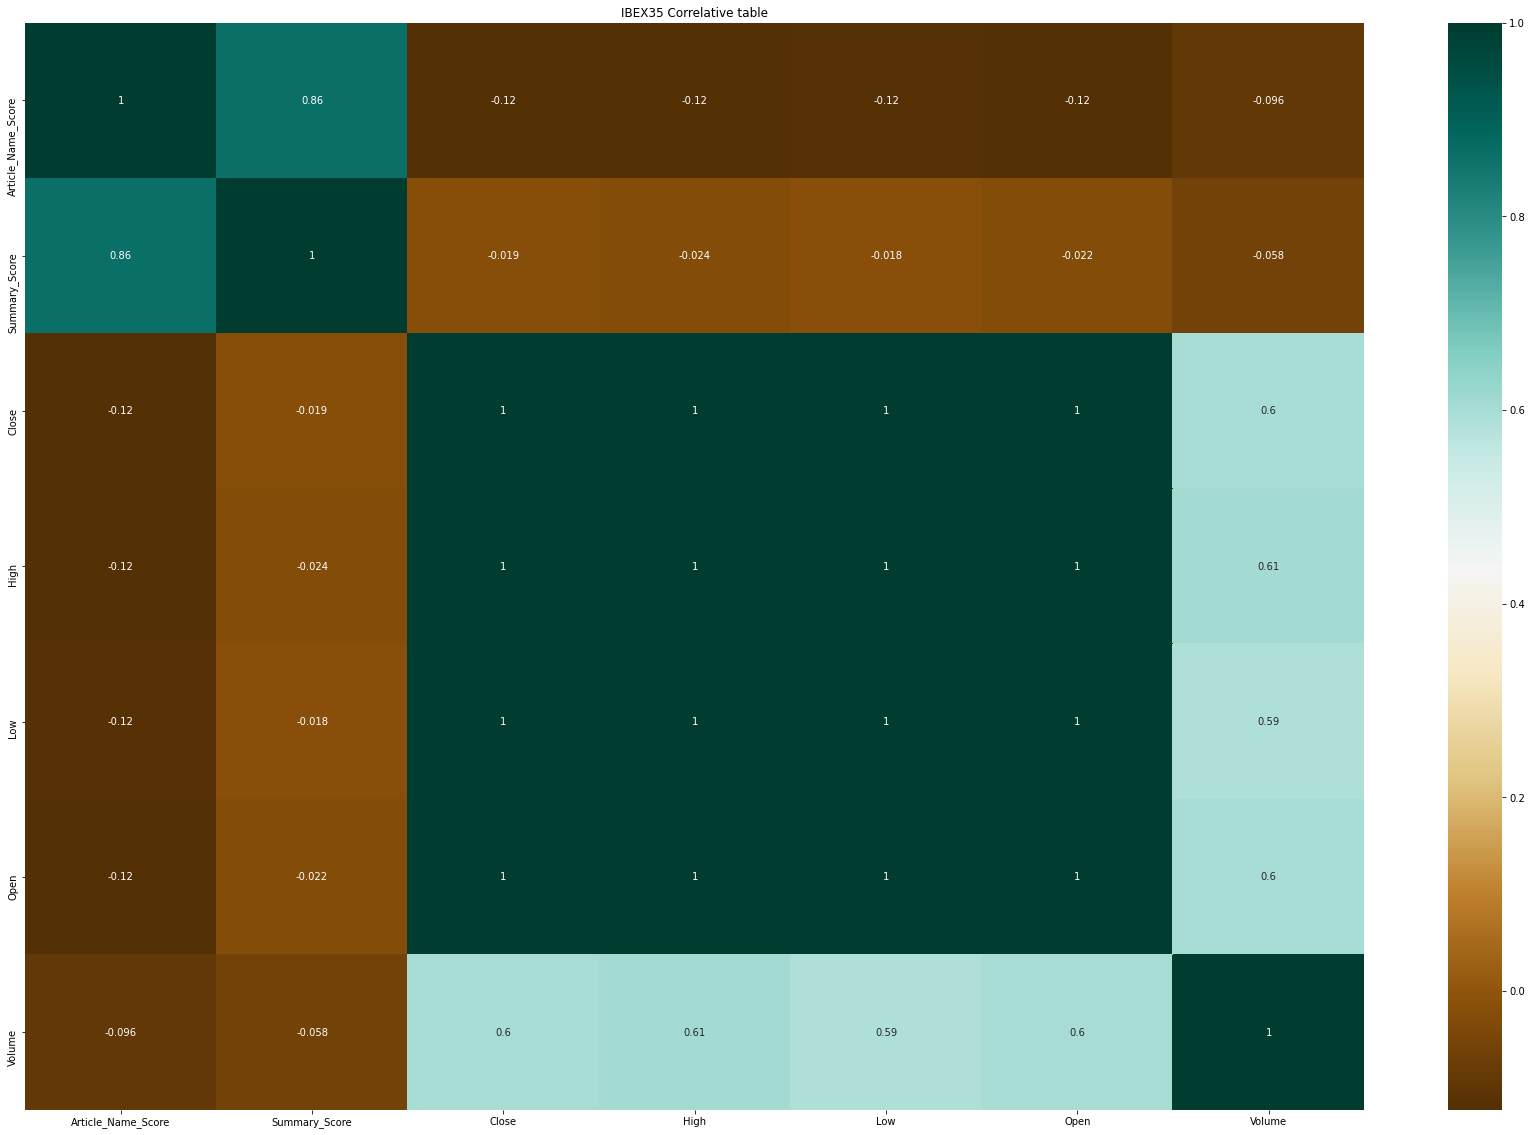

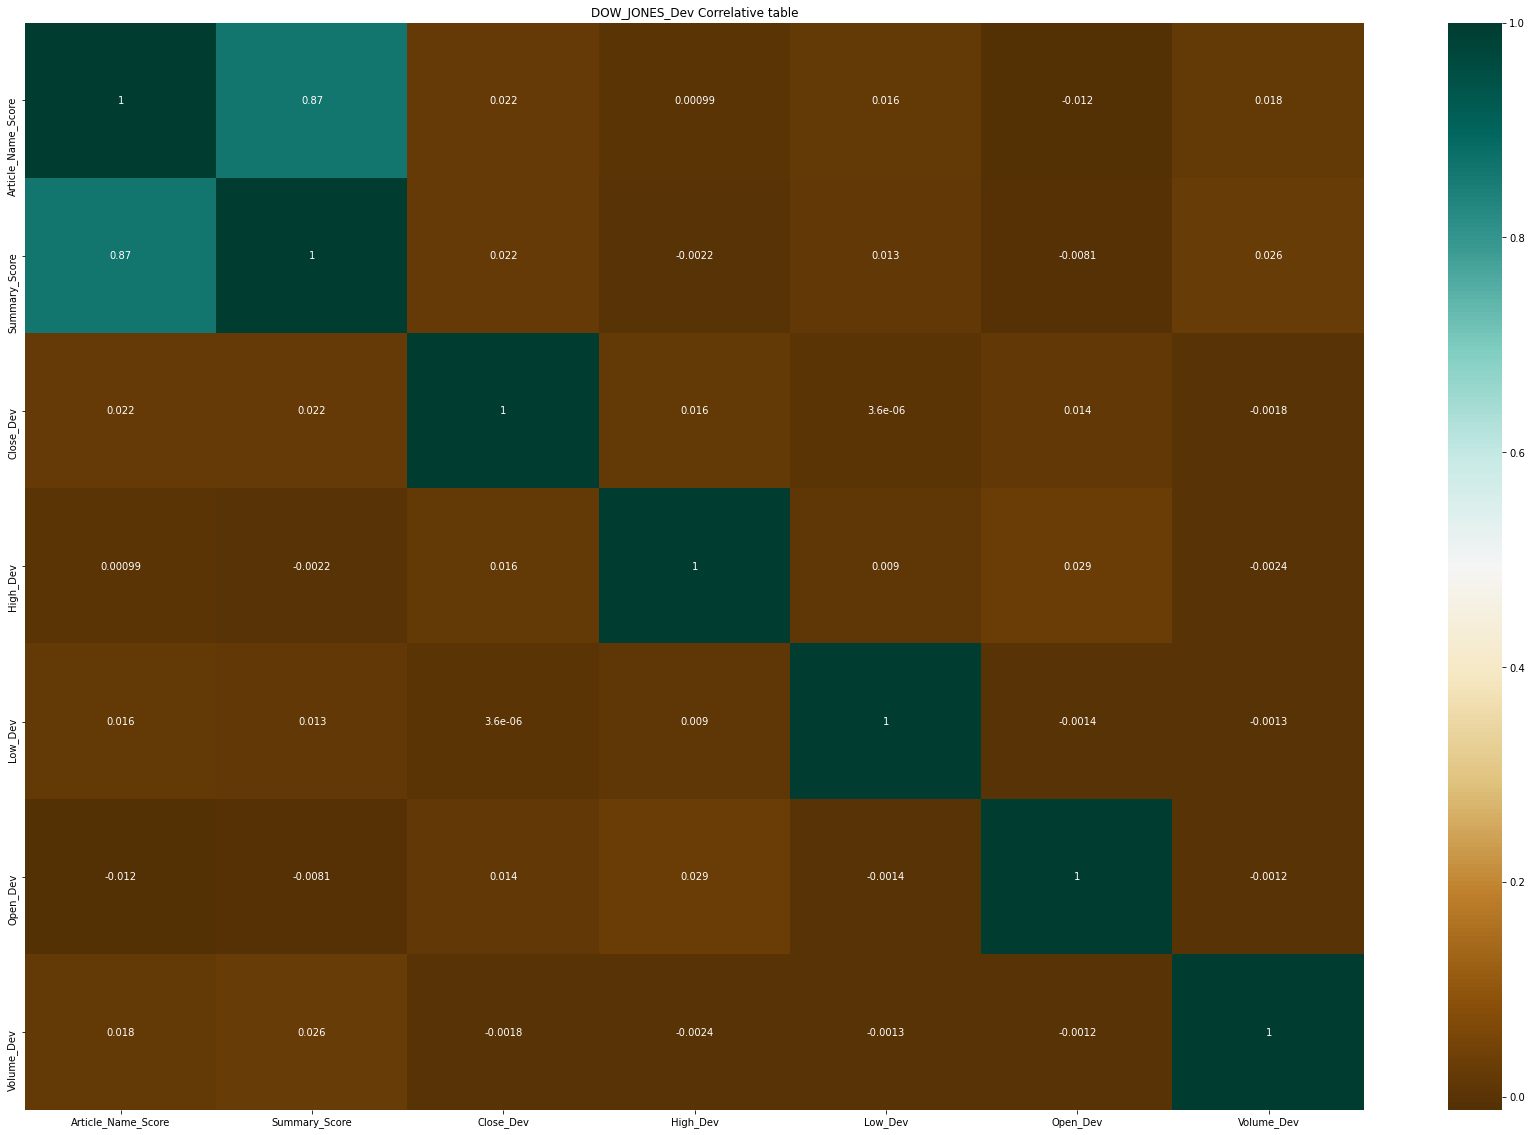

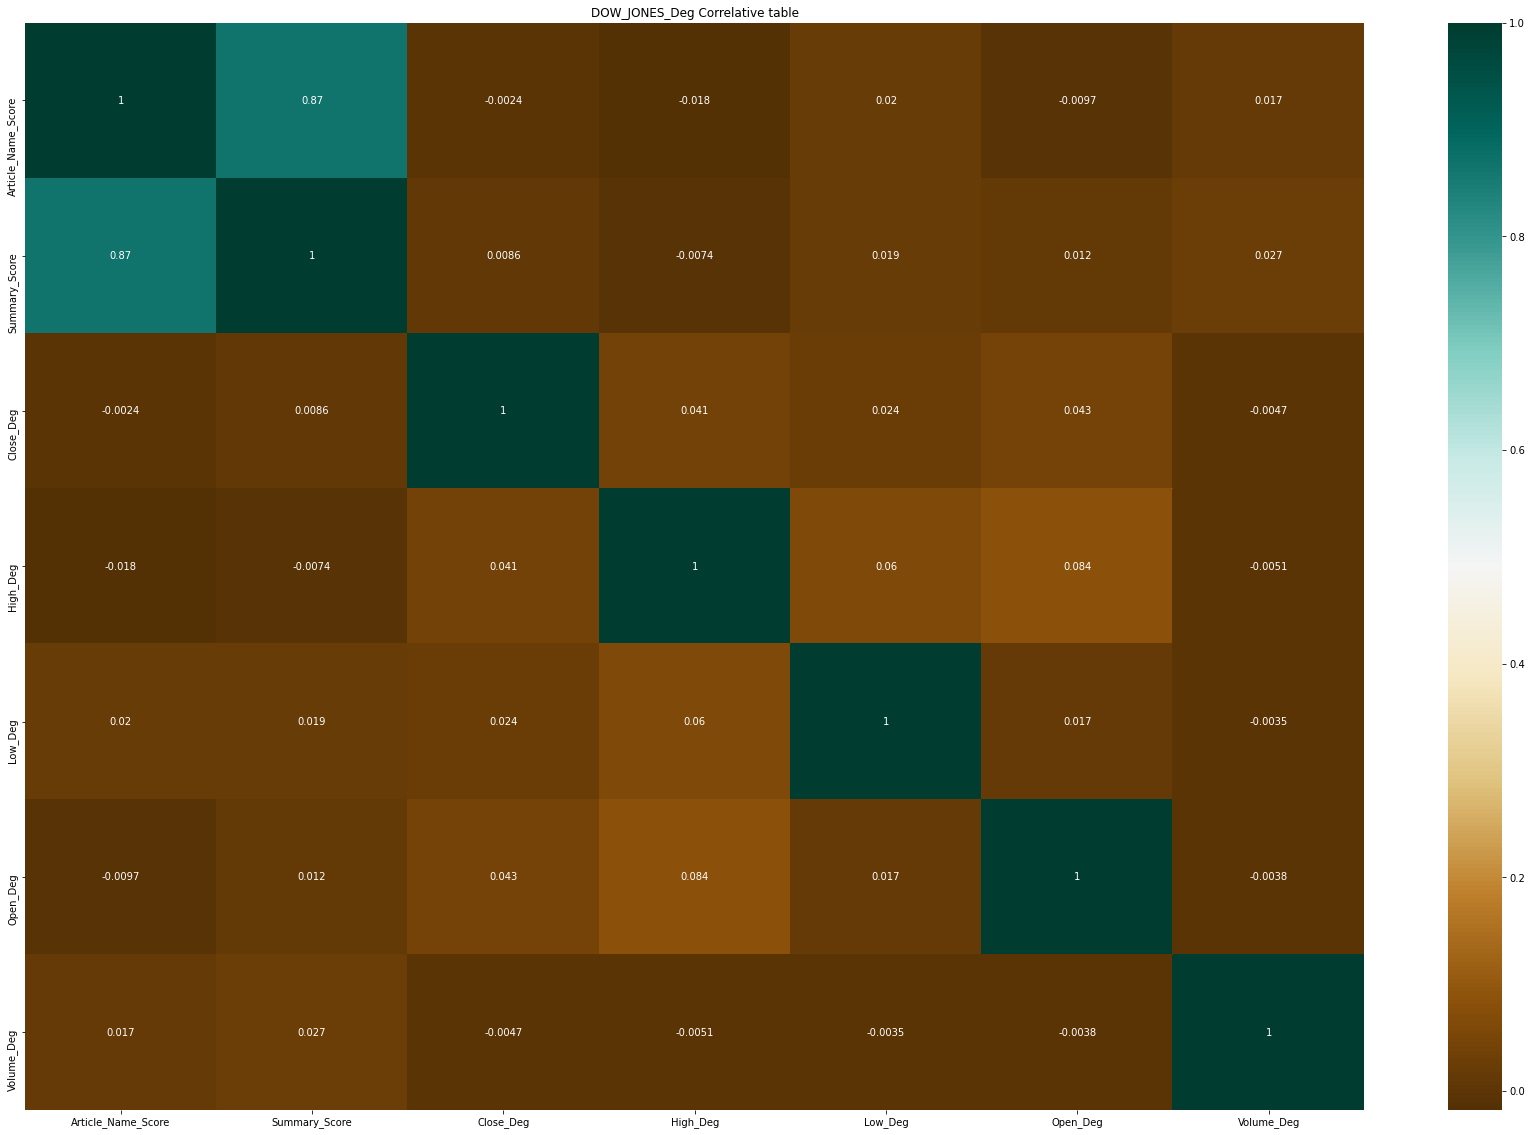

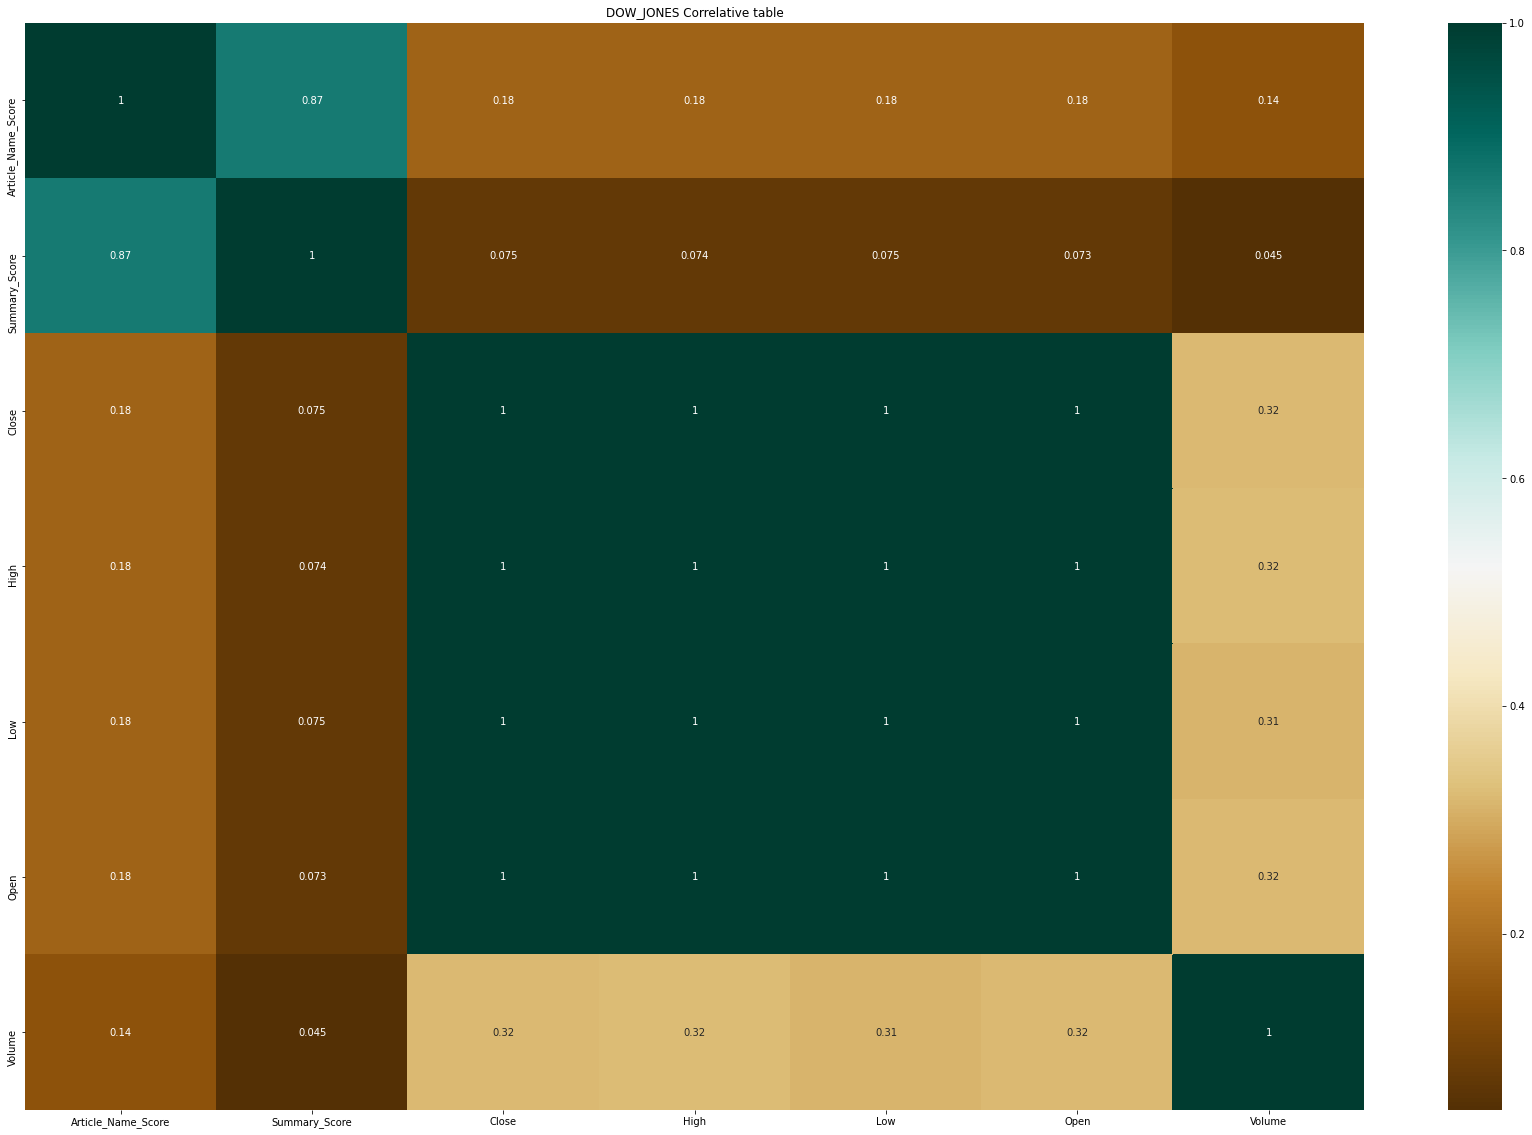

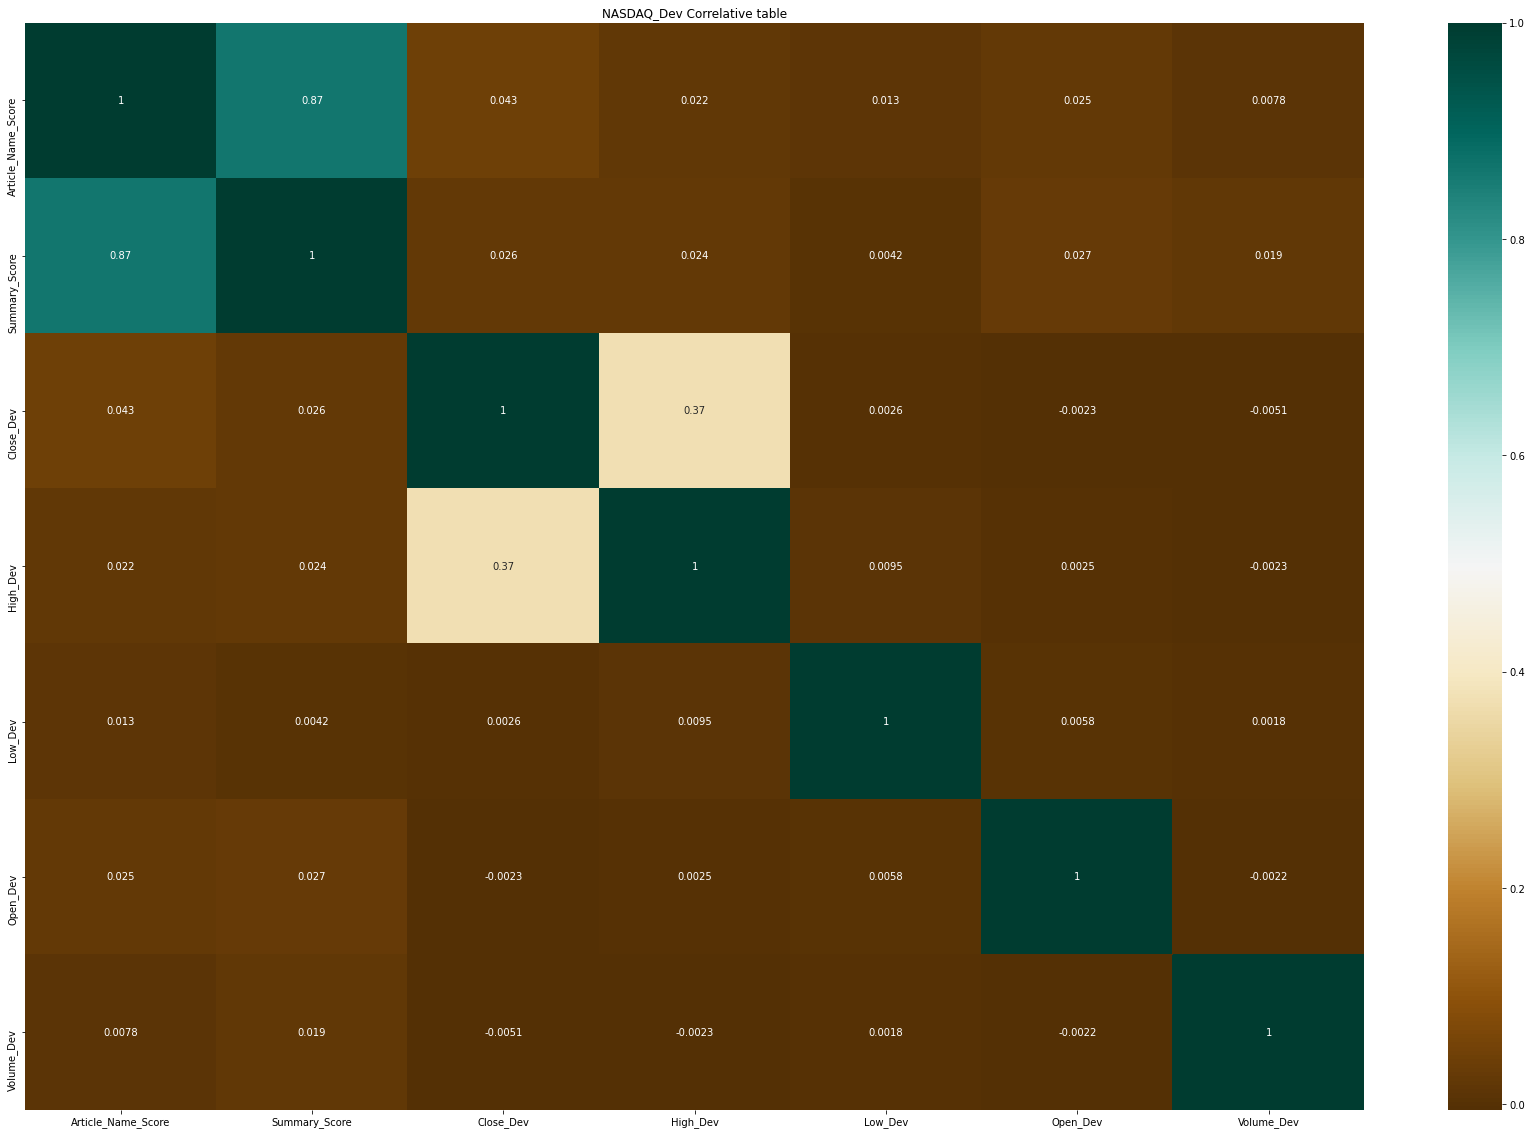

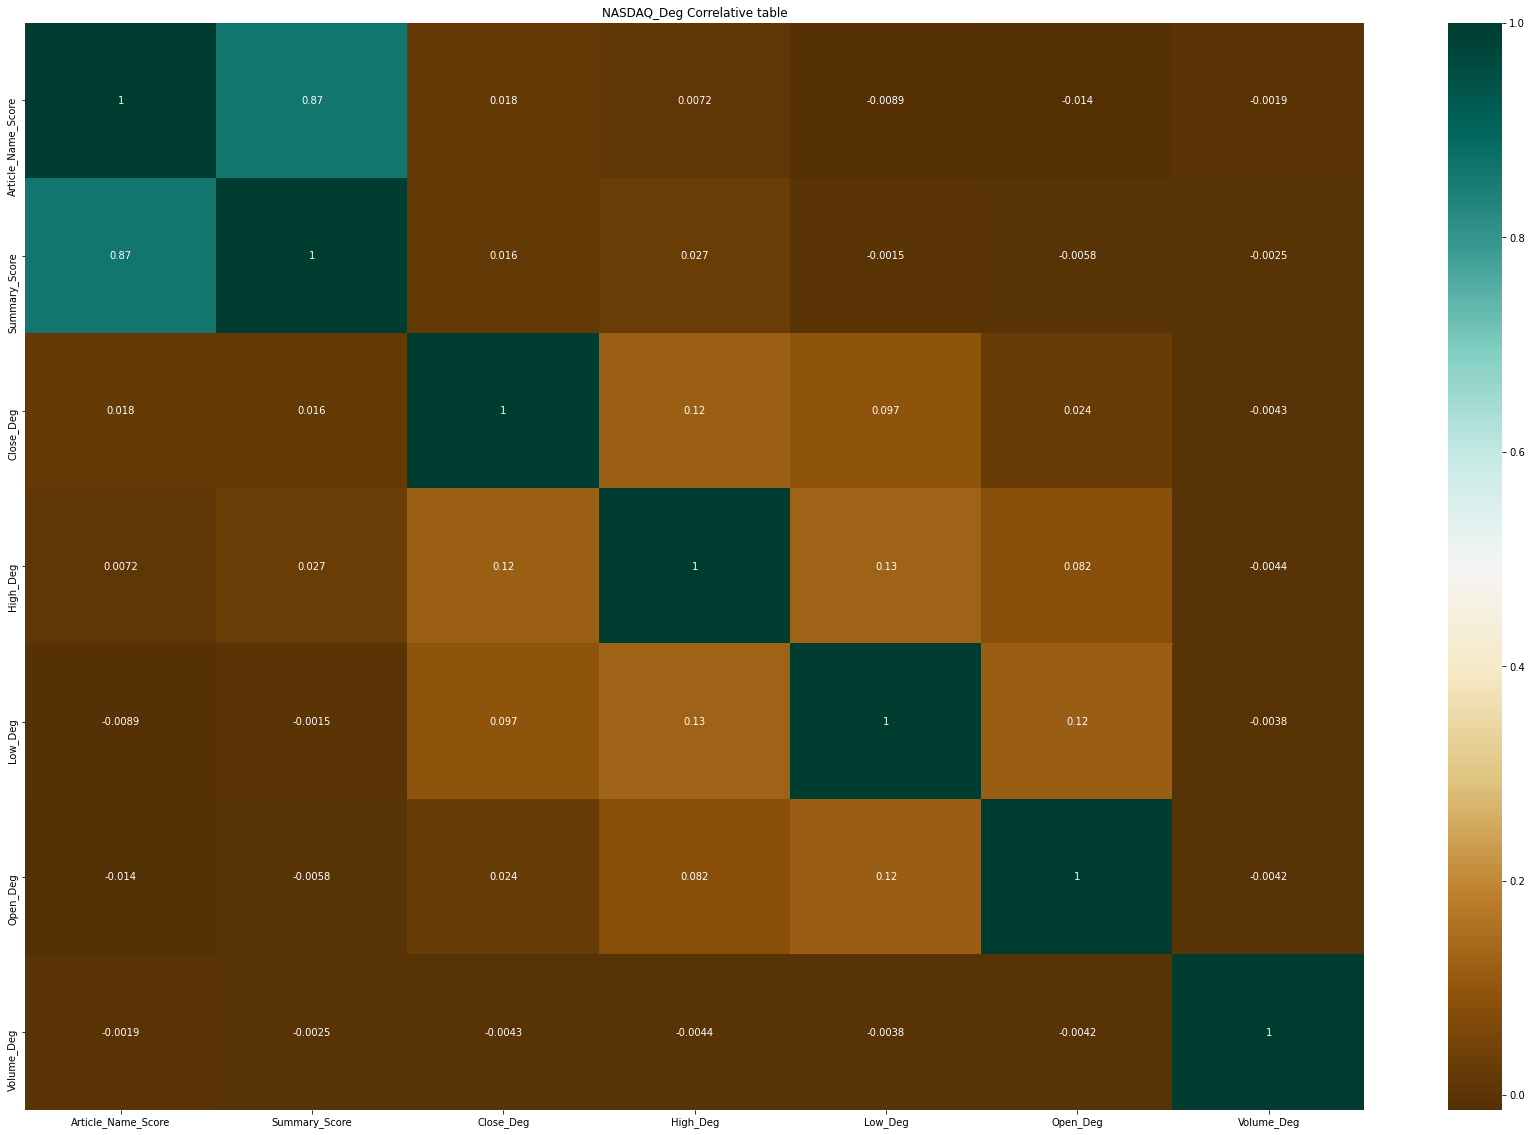

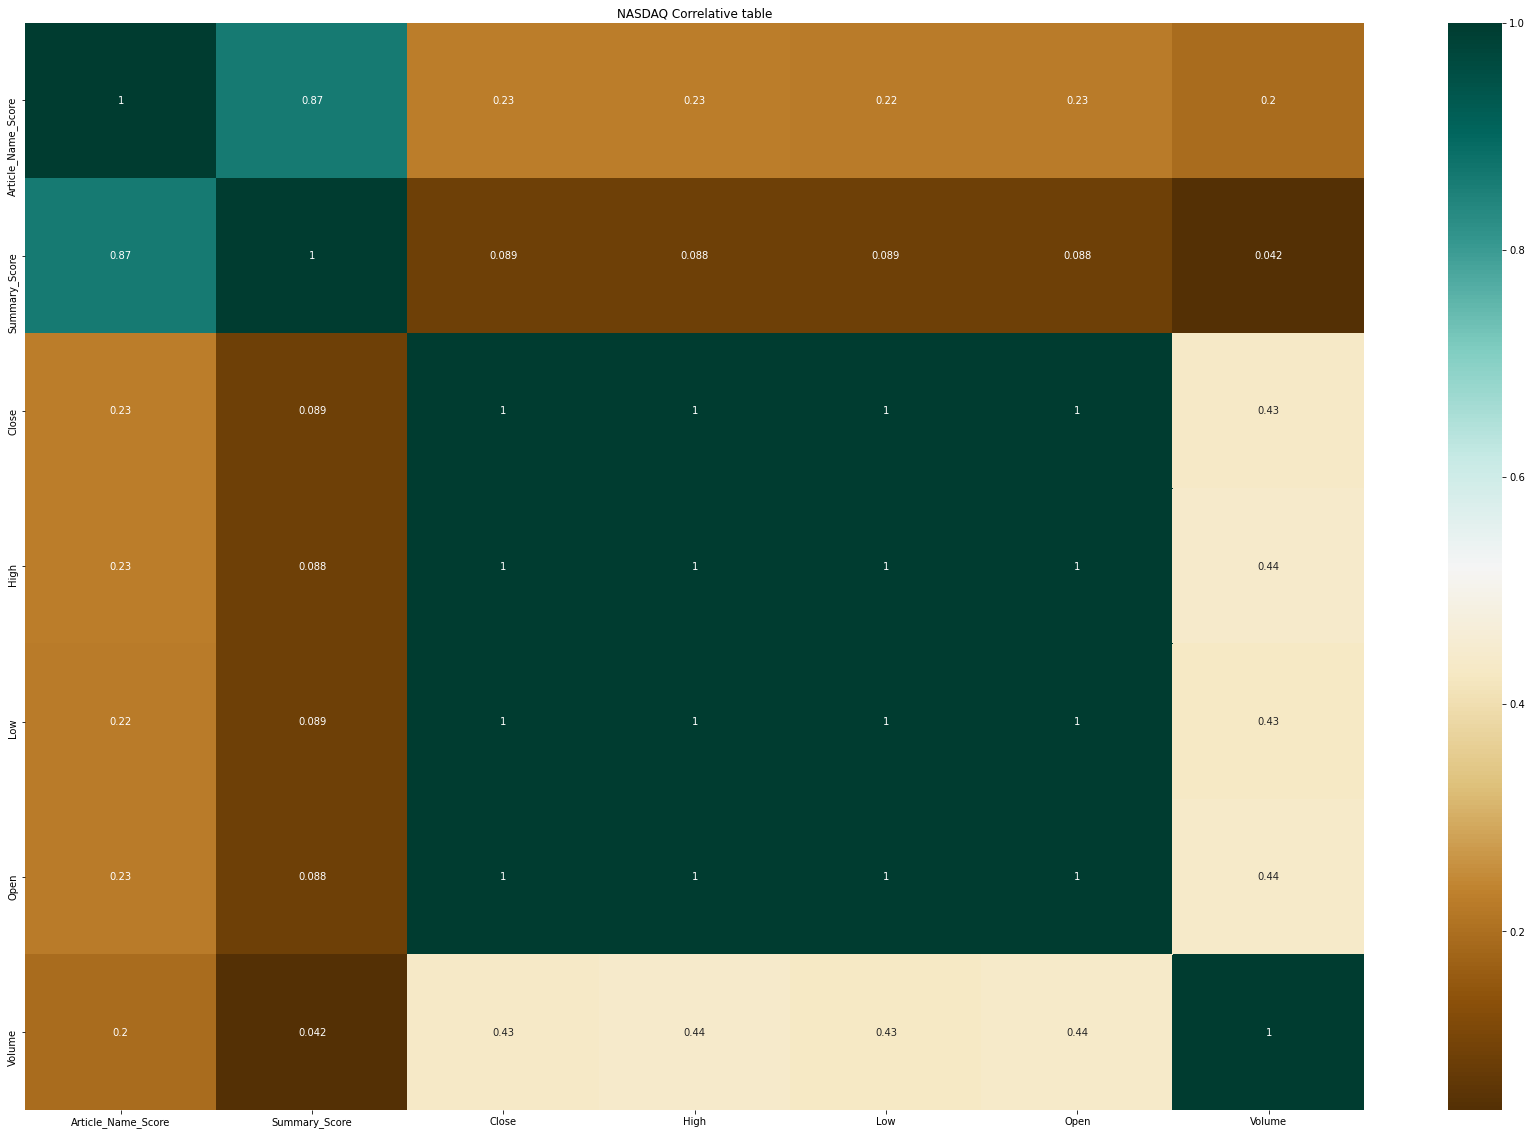

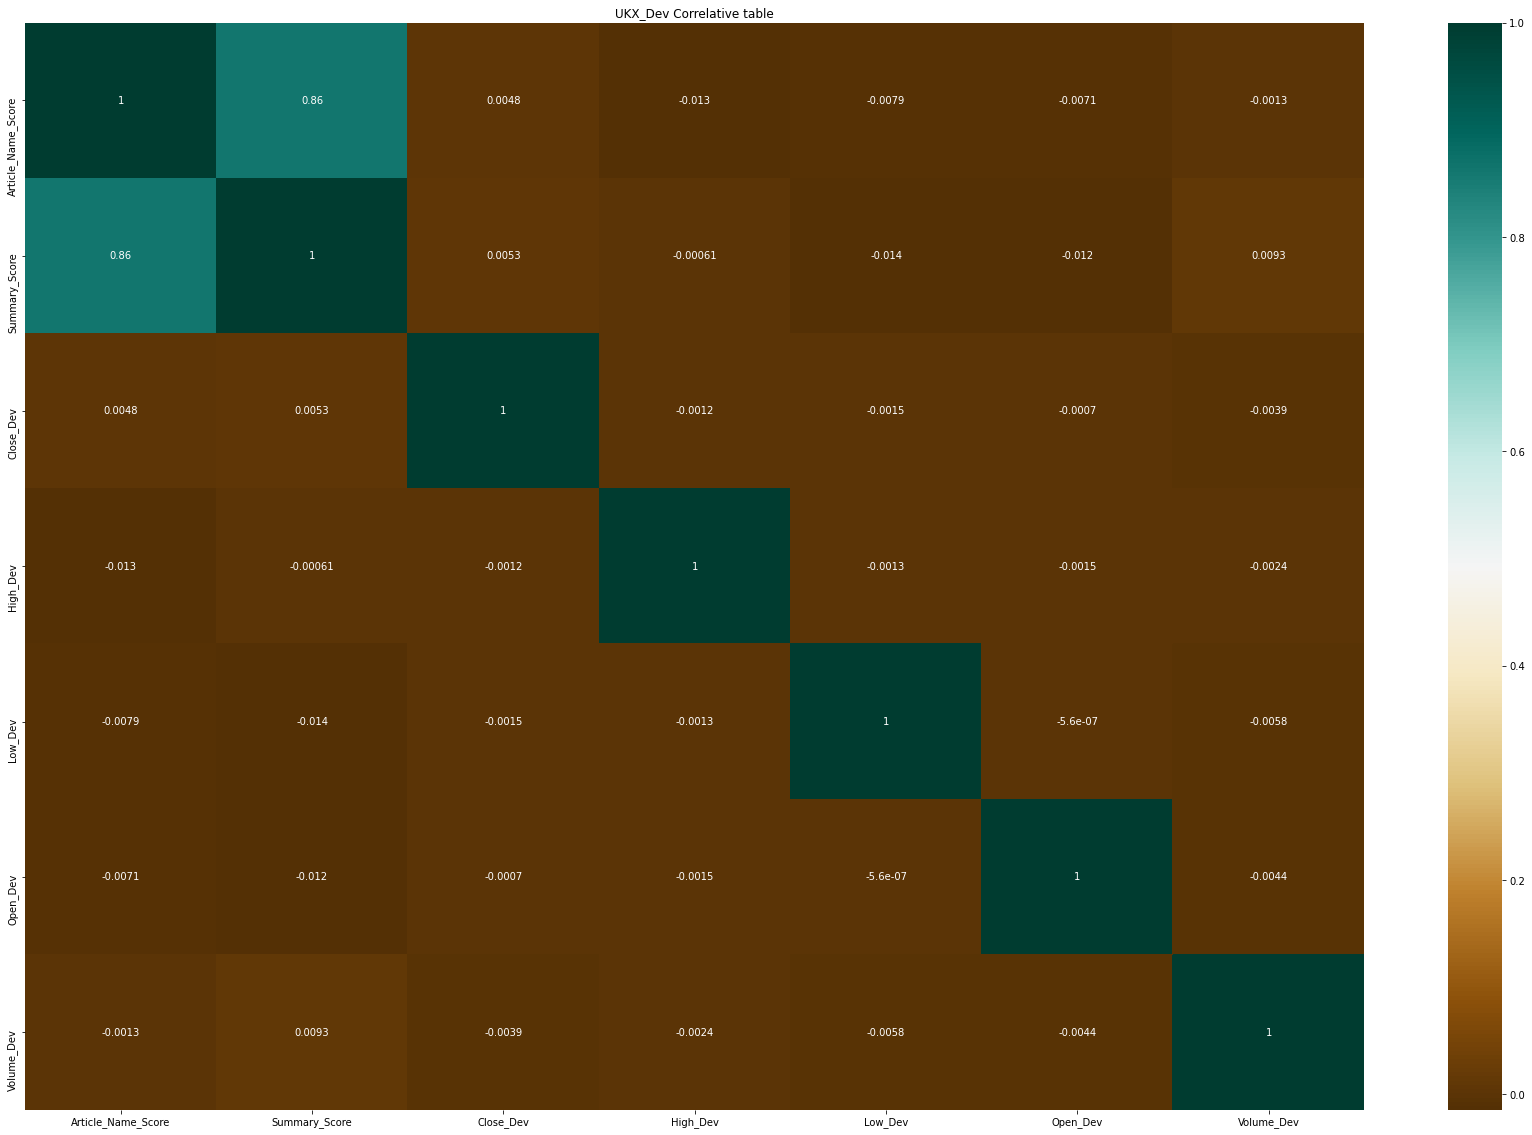

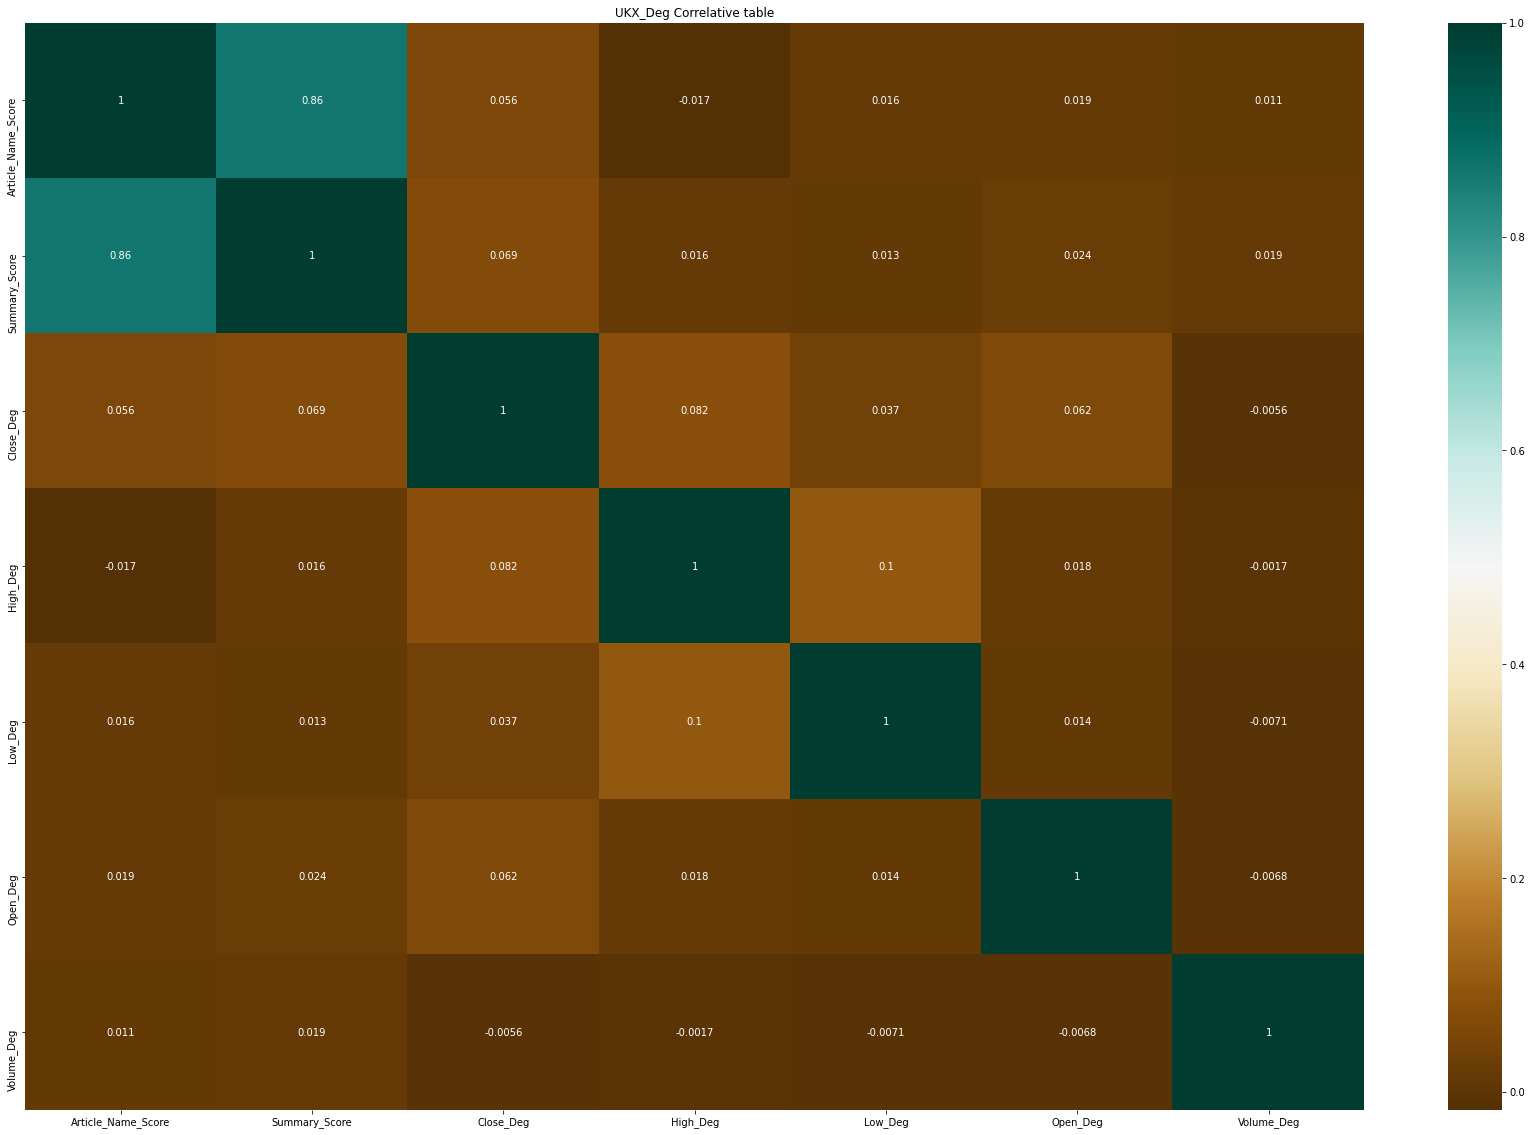

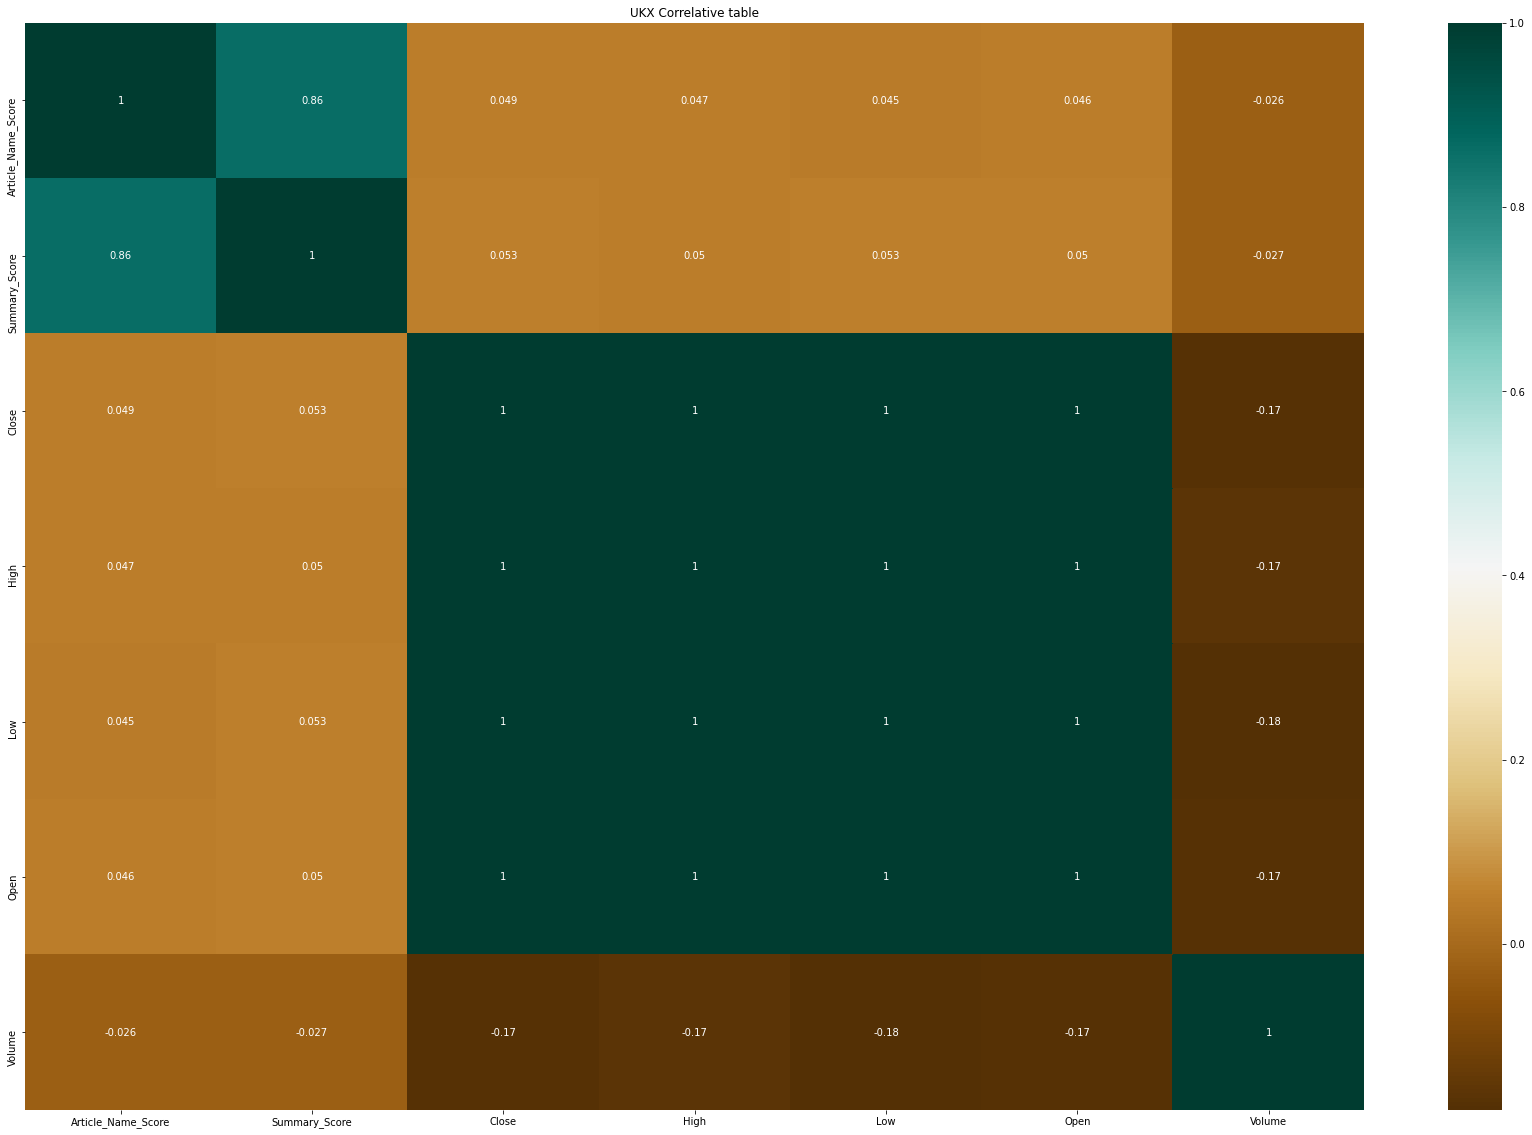

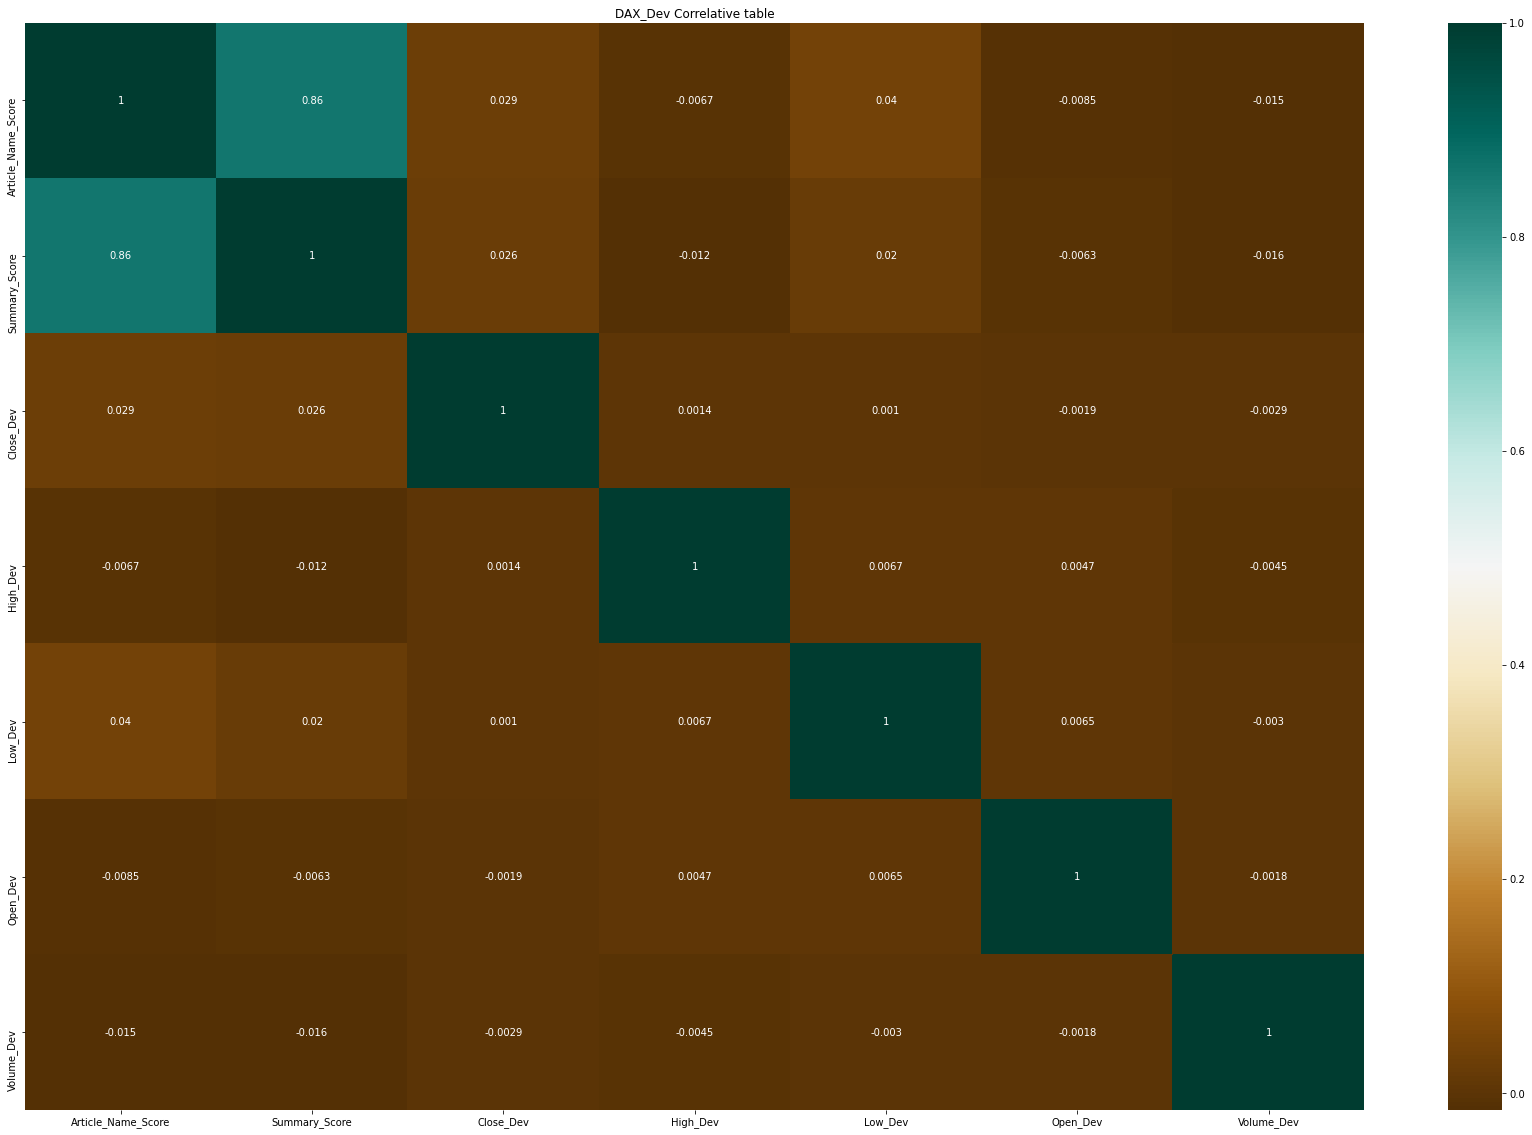

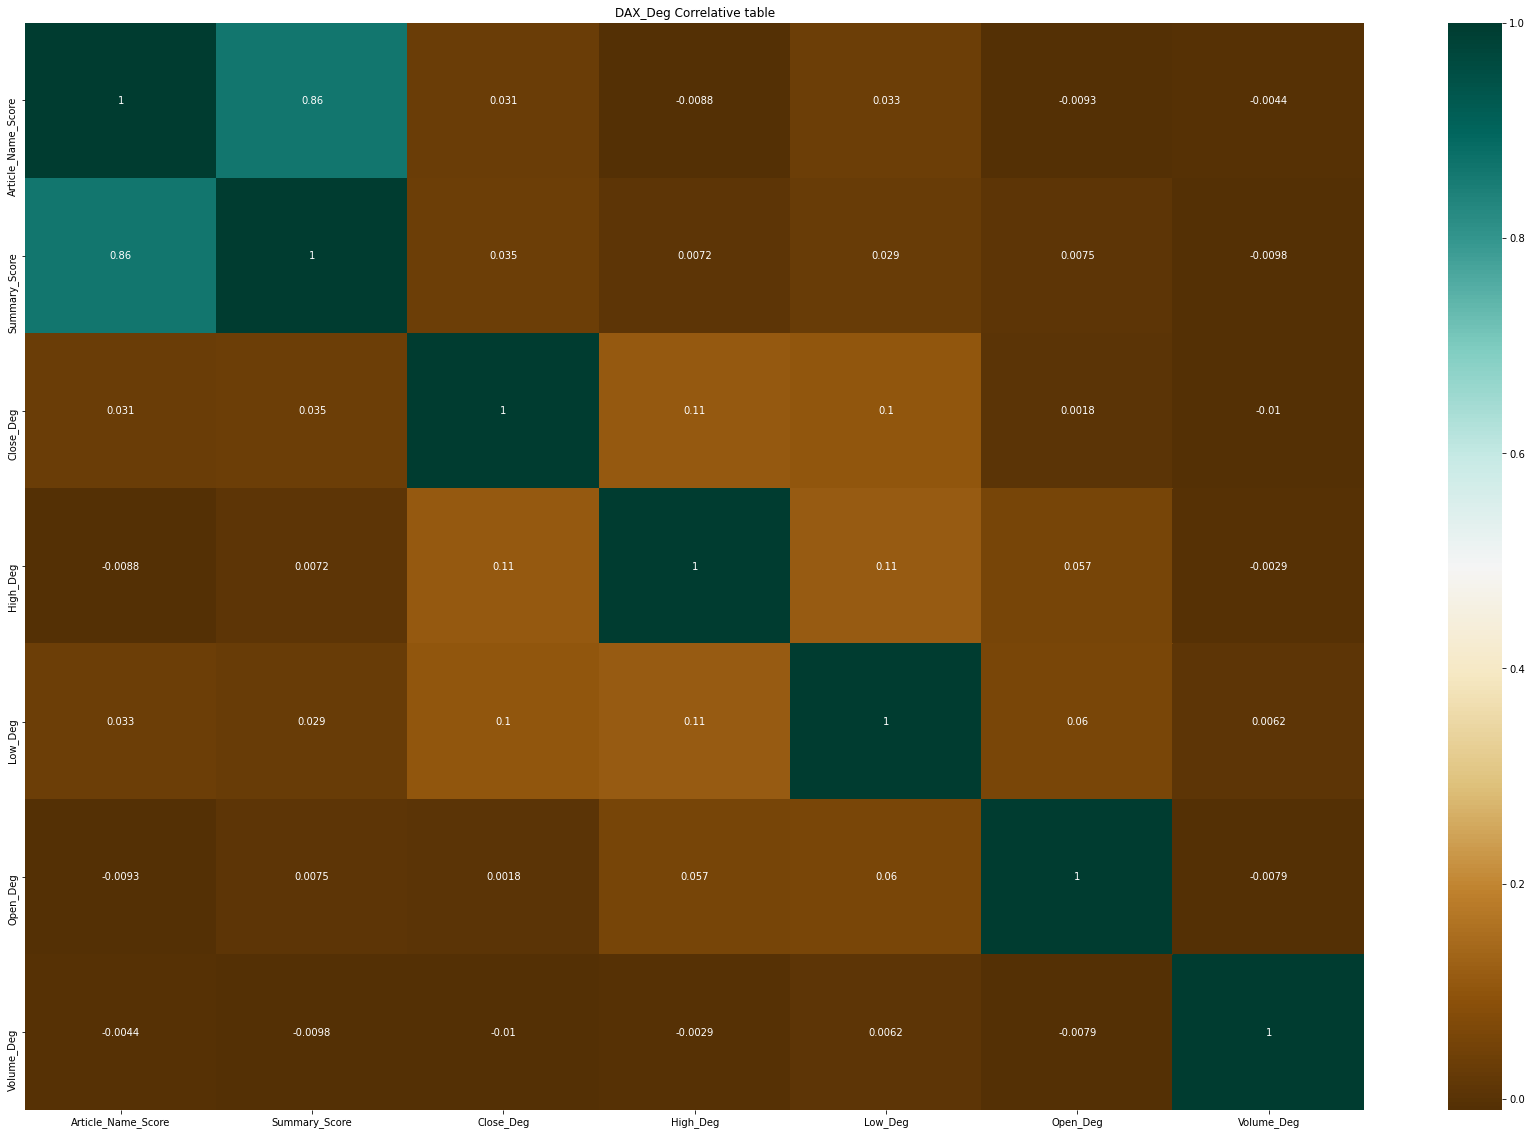

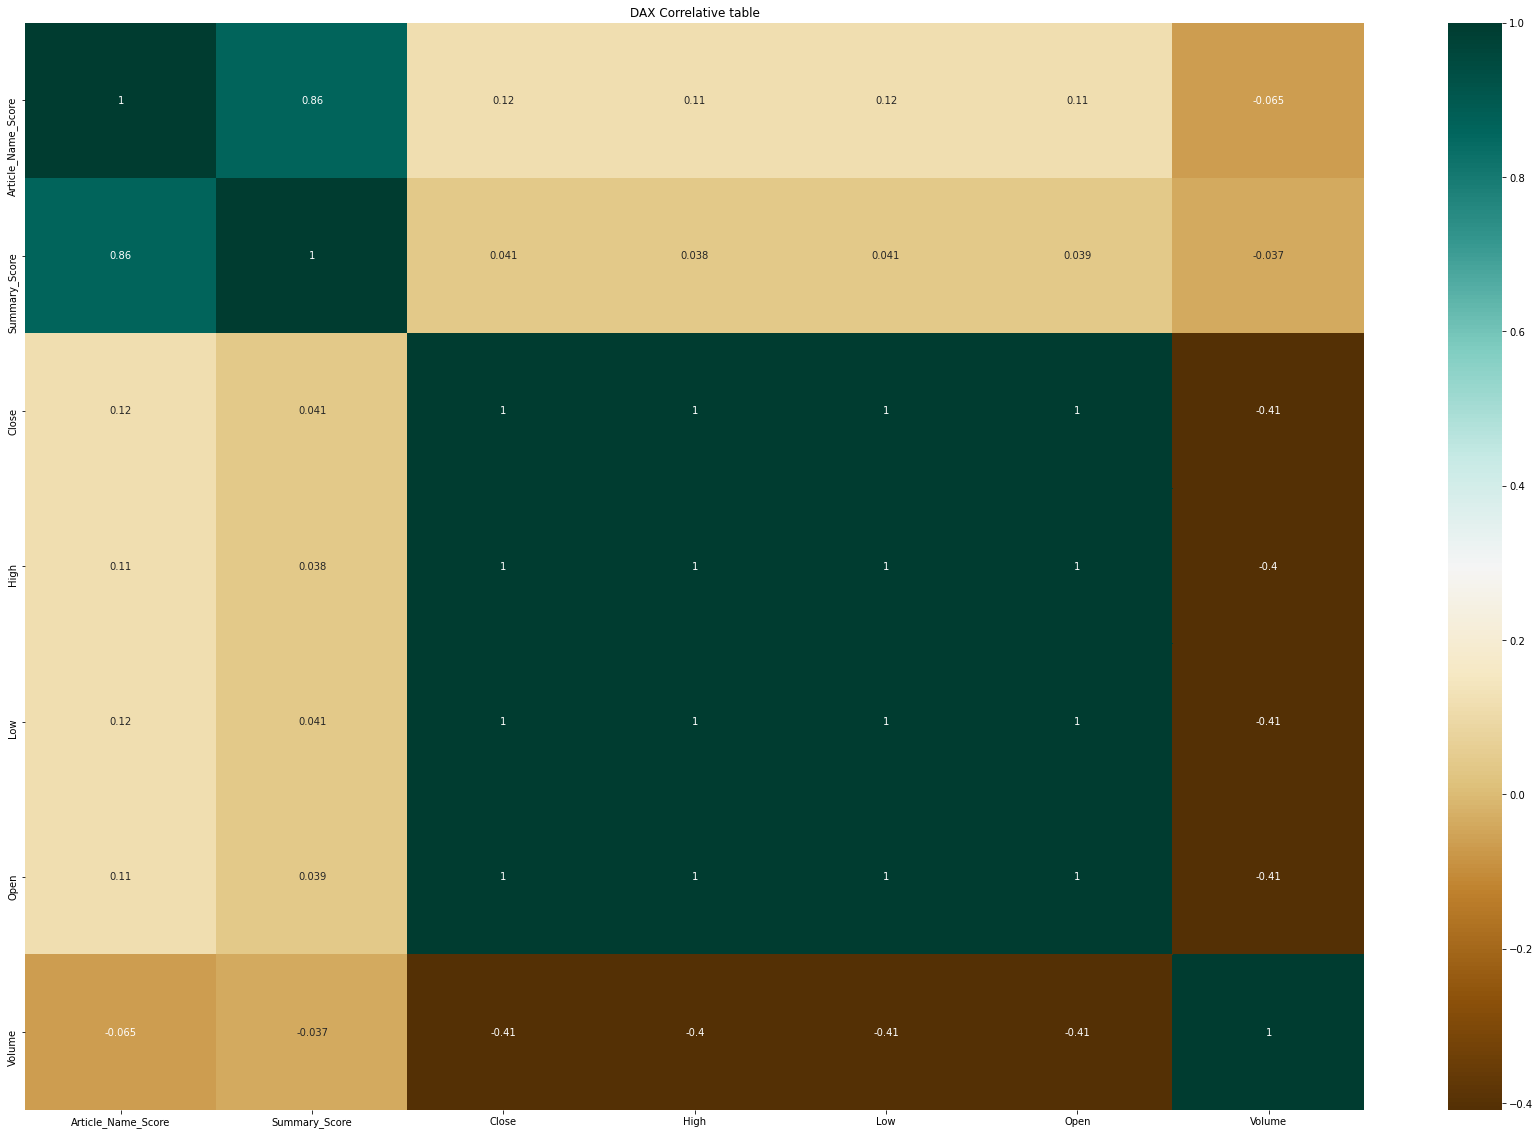

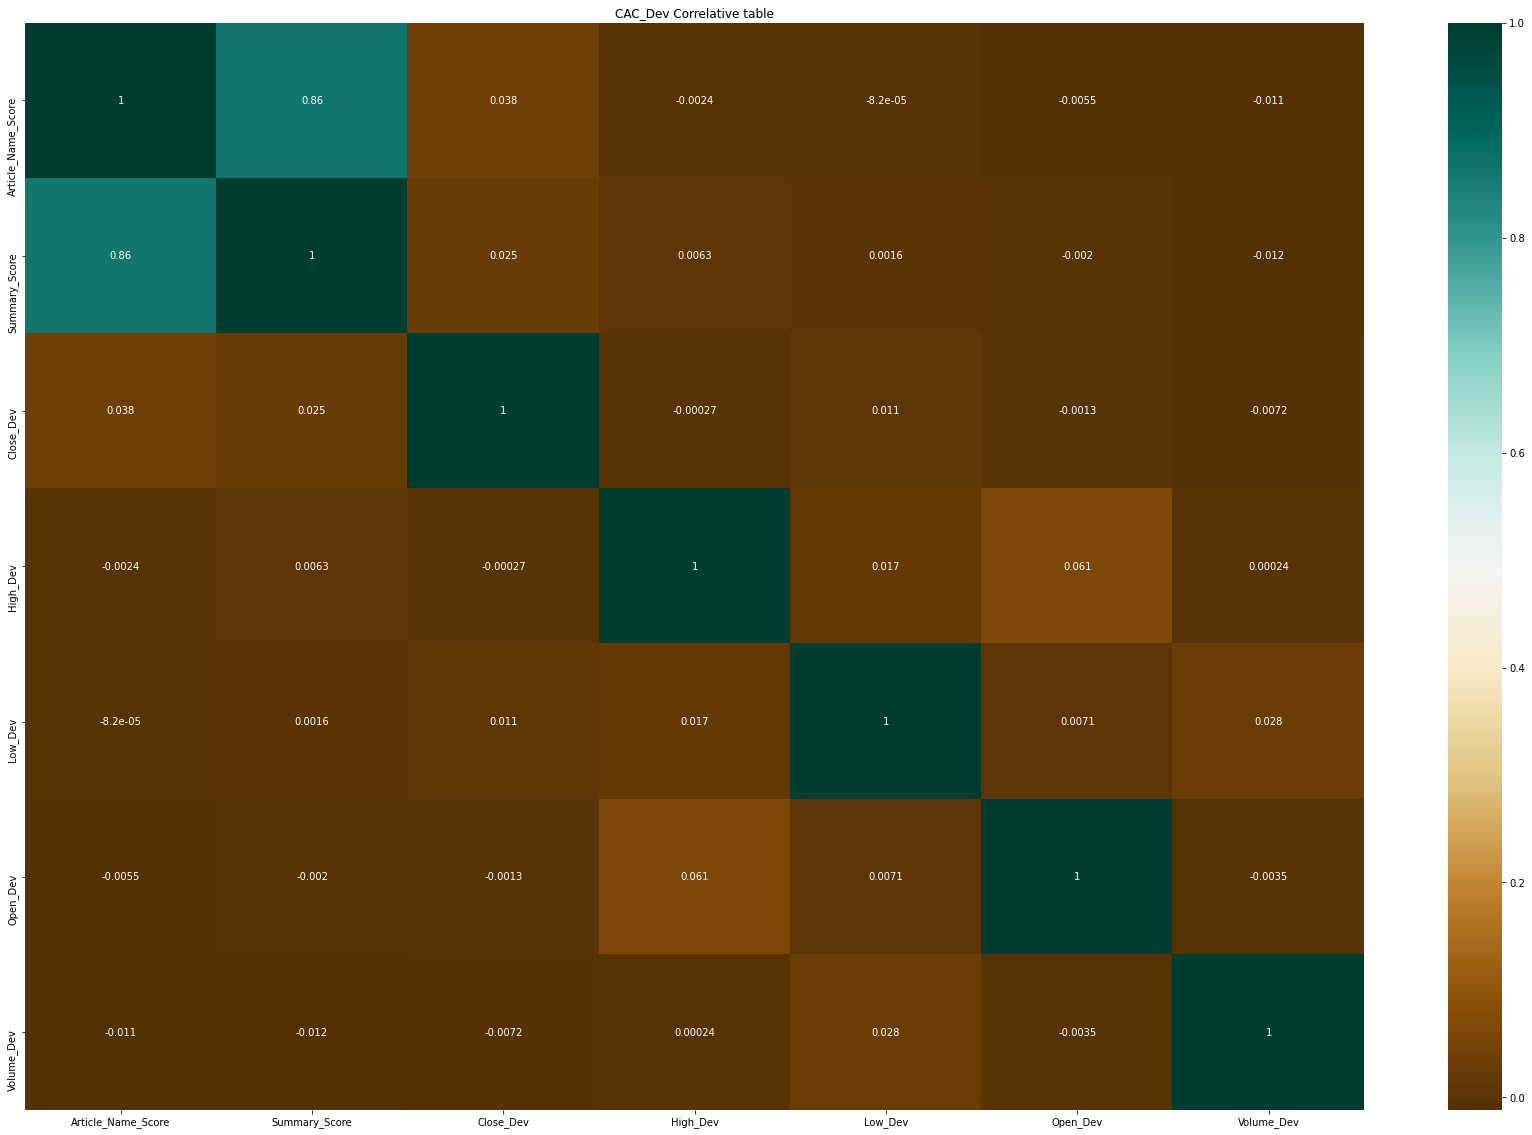

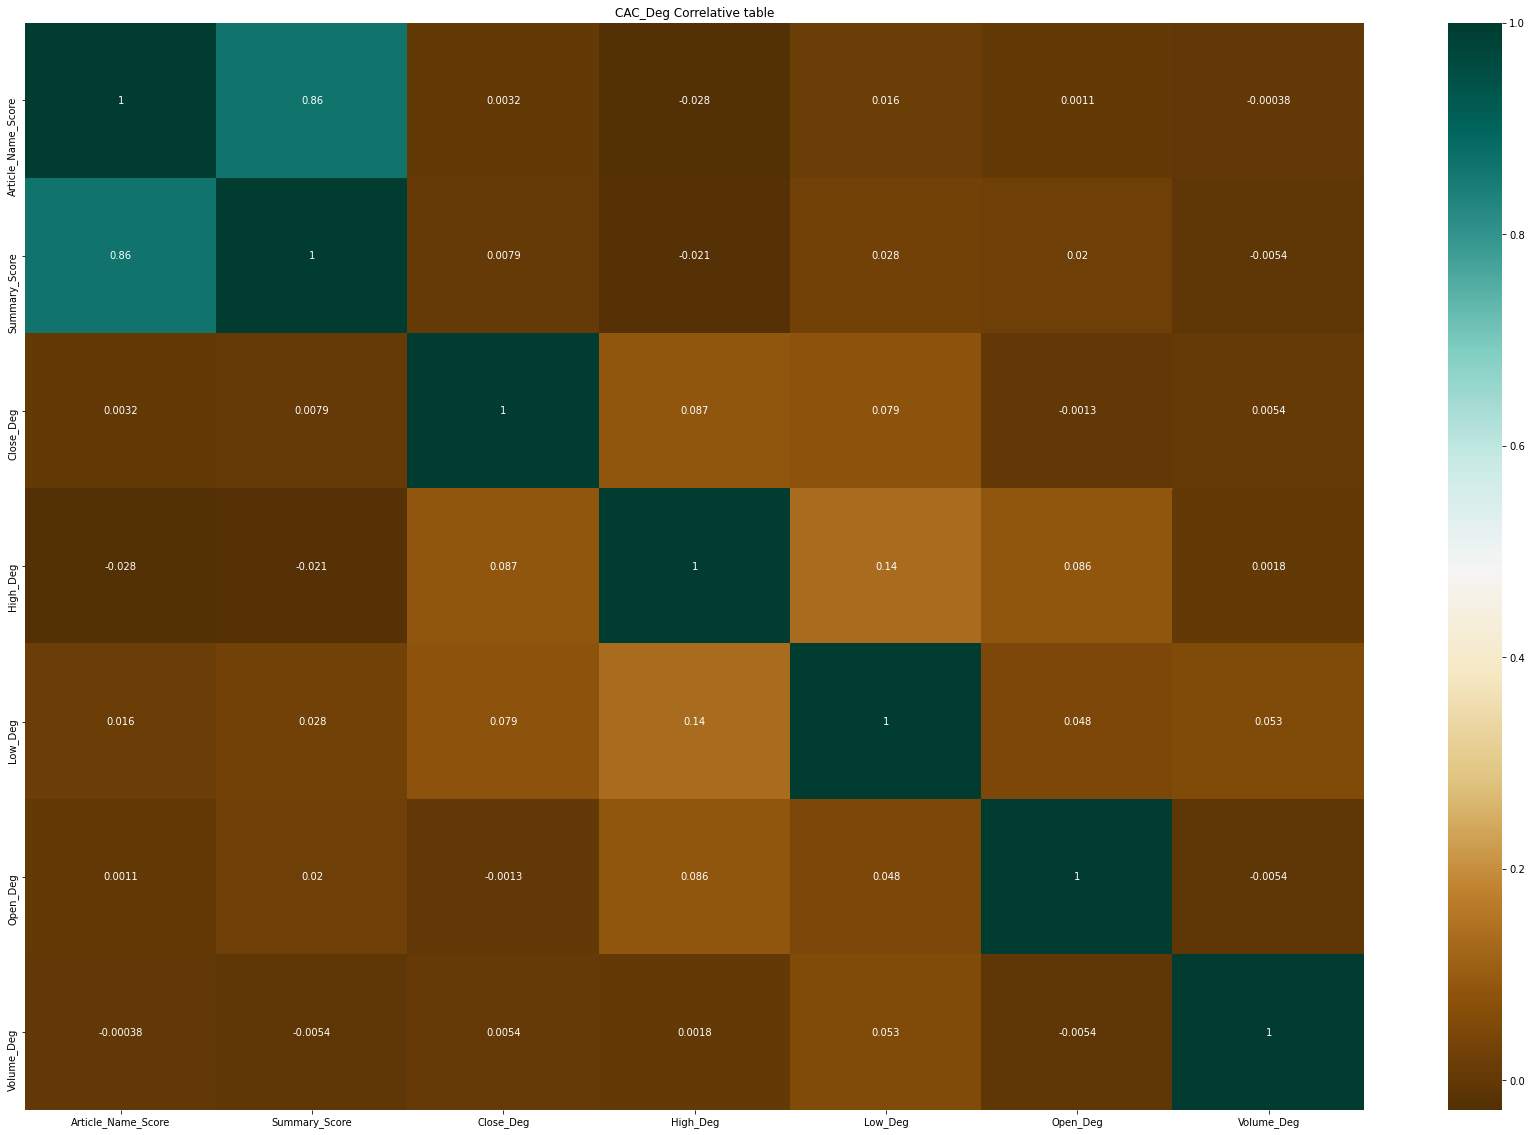

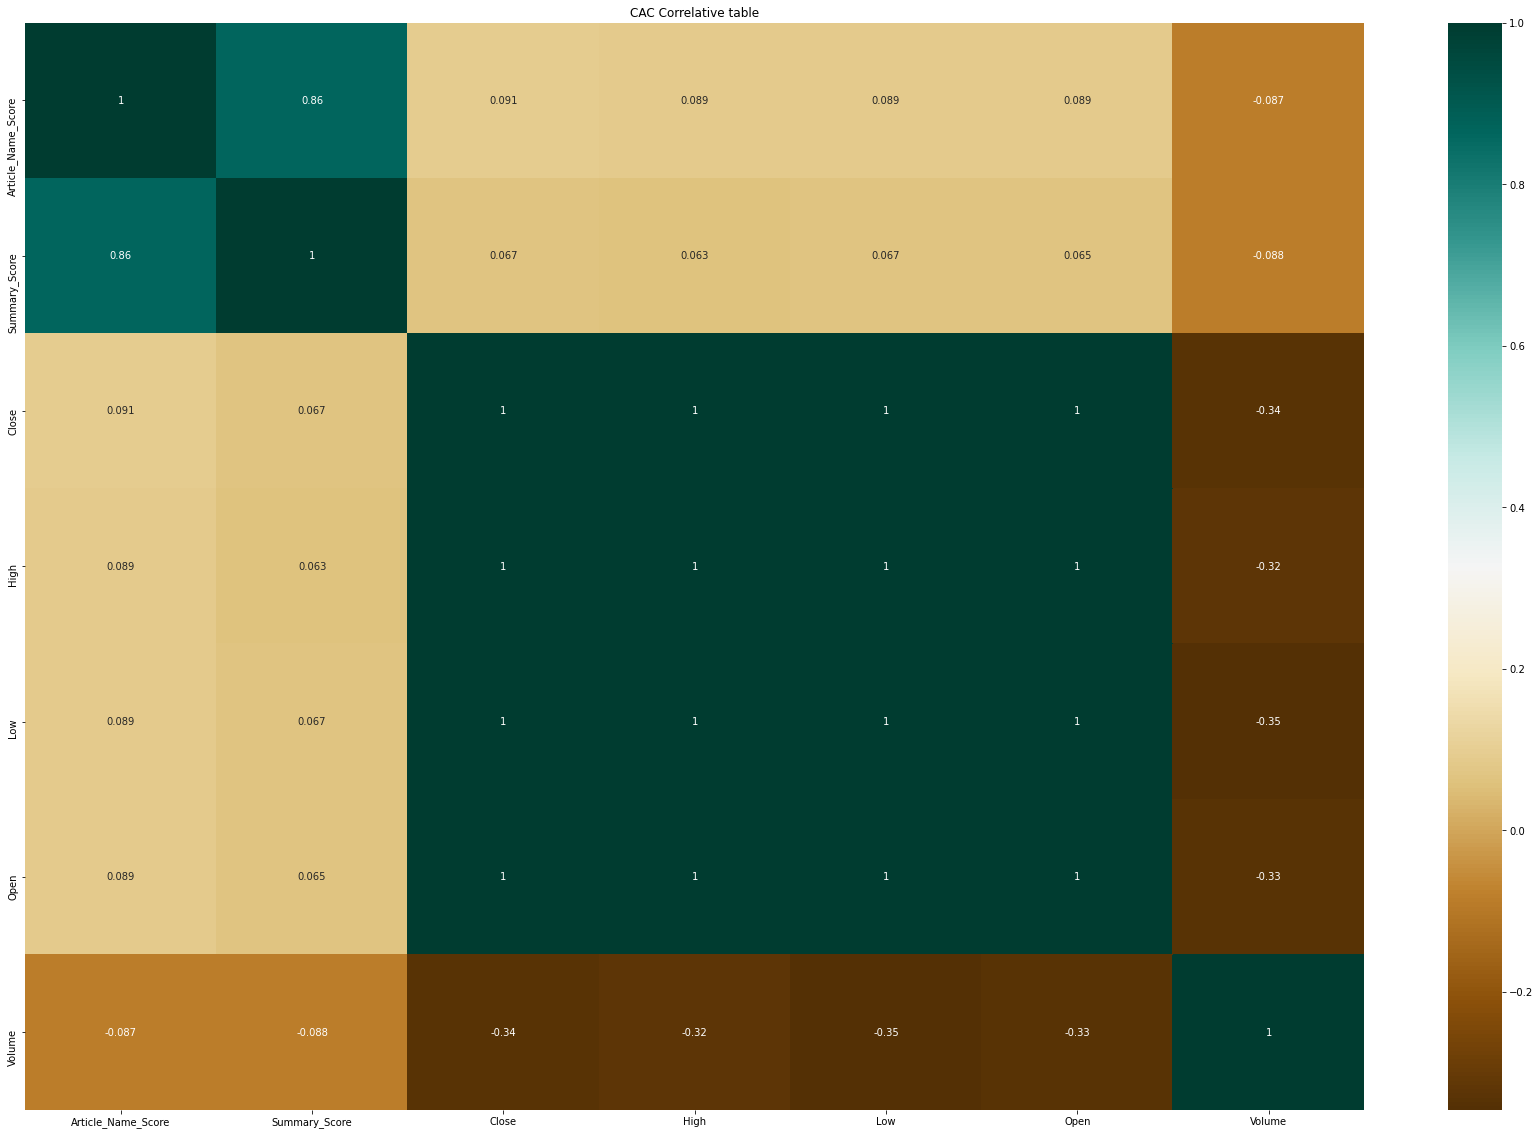

In [6]:

for ind in study_keys:
    mnd.corr_calc_and_rep_from_csv(ind, hot_wiki_df)

In here we begin to check more in detail the data received, scoring per desired index and badge

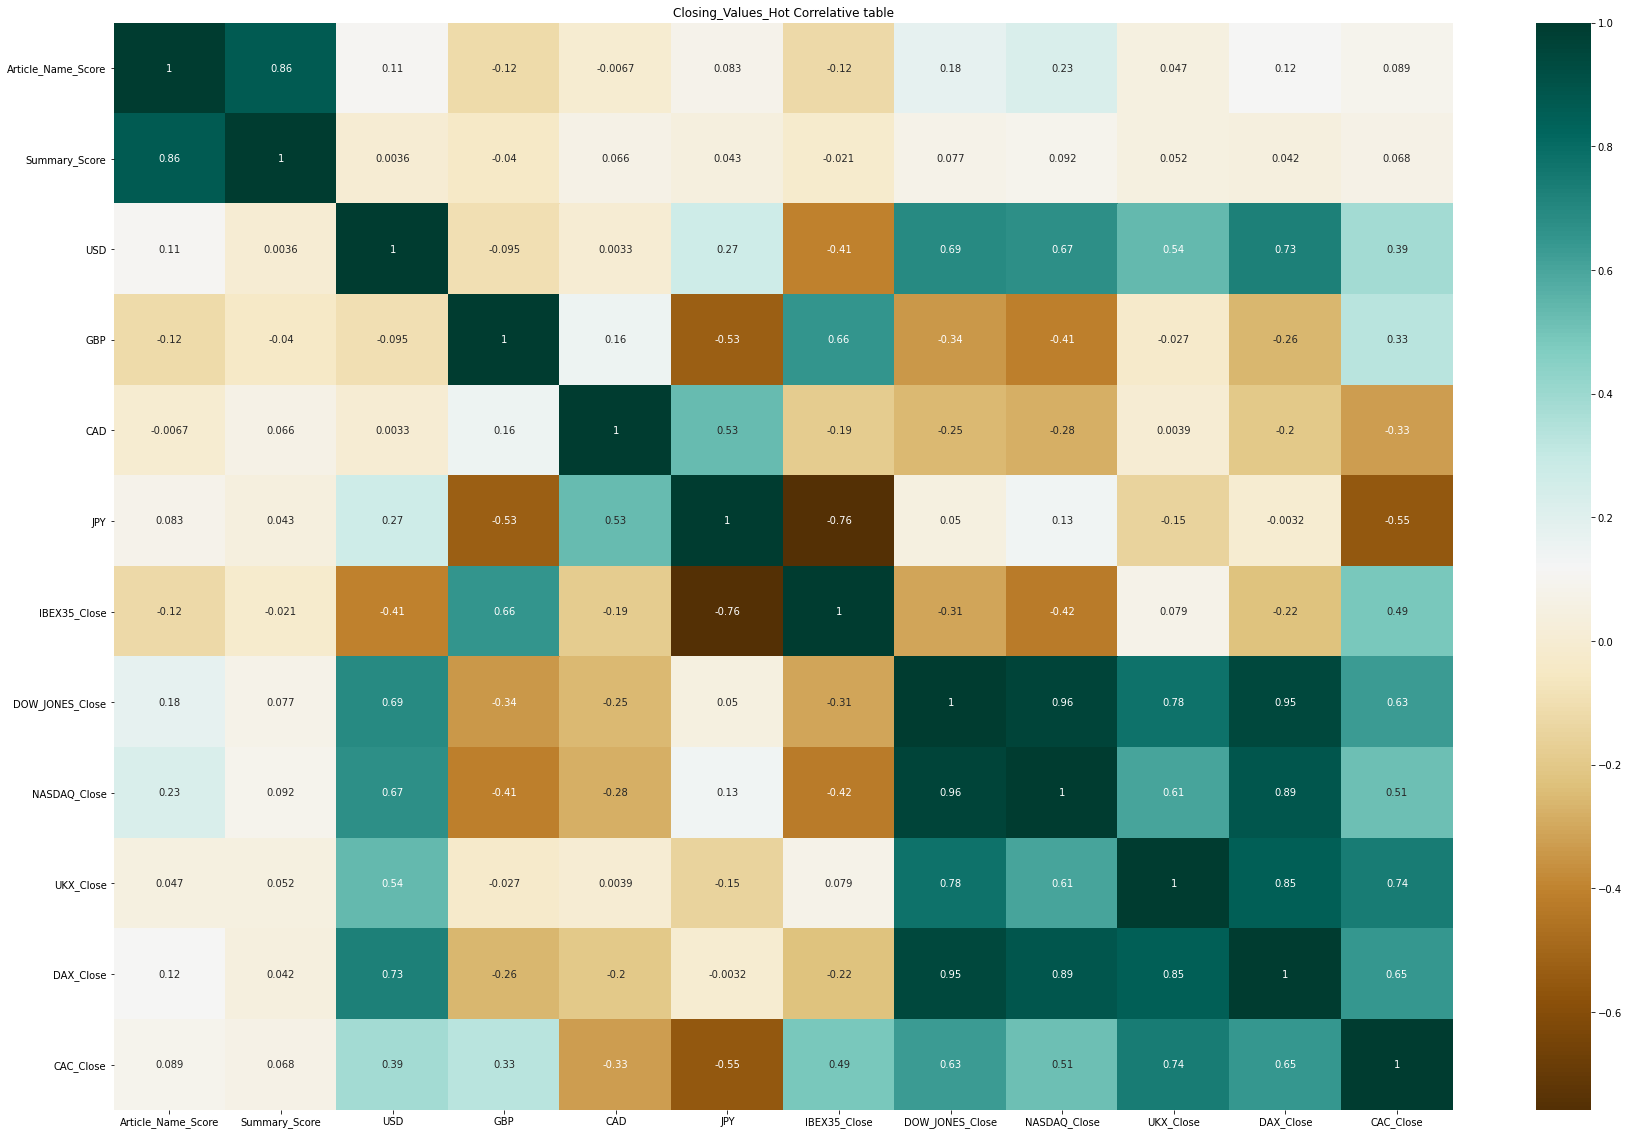

In [9]:
index_key = ["IBEX35","DOW_JONES","NASDAQ","UKX","DAX","CAC"]
divisa_interest = ["USD","GBP","CAD","JPY"]

markers_no_dev = mnd.markers_maker("Closing_Values", index_key, ["Close"] , divisa_interest)
hot_no_dev = pd.concat([hot_wiki_df, markers_no_dev], axis=1 , join = "inner")
closing_hot_df = vt.corr_table_not_filtered(hot_no_dev,"Closing_Values_Hot", ret = True)

In here we will check the top abosolute of the correlations, to proceed with a more detailed evaluation

In [10]:
top = mnd.get_top_abs_correlations(closing_hot_df)
top = pd.Series(top)
top = top[top > 0.60]
top

DOW_JONES_Close     NASDAQ_Close       0.962396
                    DAX_Close          0.949966
NASDAQ_Close        DAX_Close          0.889198
Article_Name_Score  Summary_Score      0.864403
UKX_Close           DAX_Close          0.851147
DOW_JONES_Close     UKX_Close          0.775542
JPY                 IBEX35_Close       0.758156
UKX_Close           CAC_Close          0.744455
USD                 DAX_Close          0.729752
                    DOW_JONES_Close    0.694463
                    NASDAQ_Close       0.672026
GBP                 IBEX35_Close       0.655831
DAX_Close           CAC_Close          0.649511
DOW_JONES_Close     CAC_Close          0.632595
NASDAQ_Close        UKX_Close          0.608483
dtype: float64

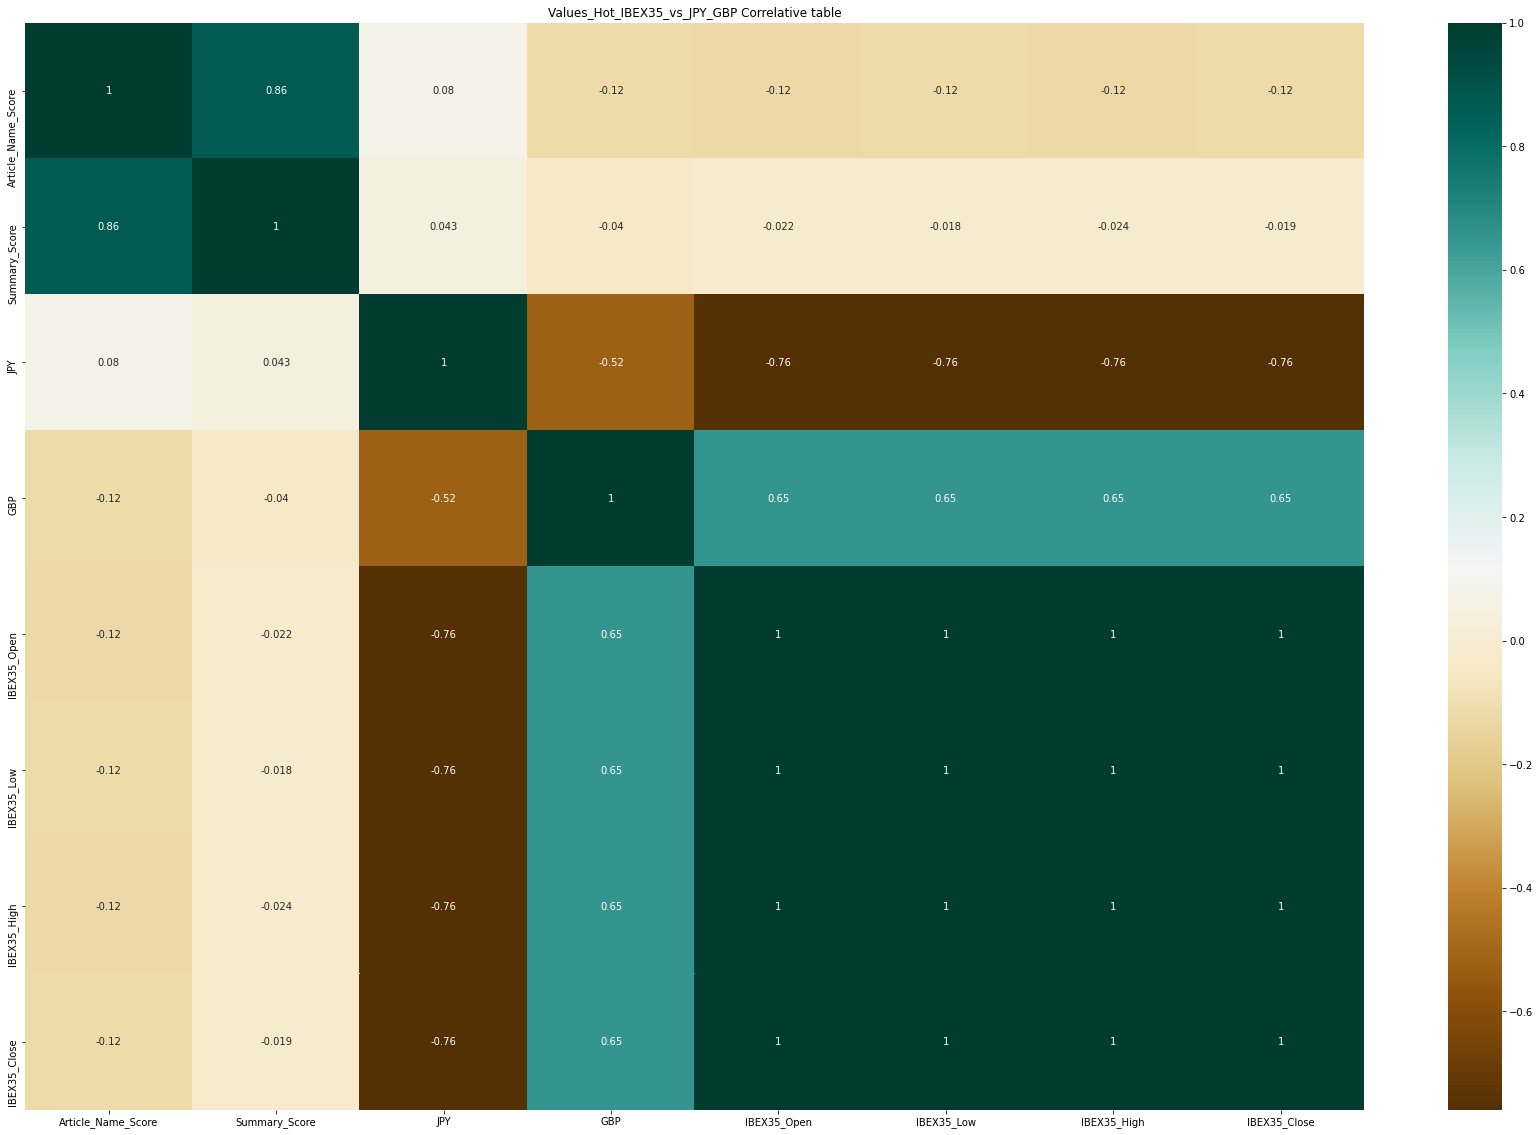

In [8]:
index_key = ["IBEX35"]
divisa_interest = ["JPY","GBP"]

markers_dev = mnd.markers_maker("Closing_Values_Hot_IBEX35_vs_JPY_GBP", index_key, ["Open","Low", "High","Close"] , divisa_interest)
hot_dev = pd.concat([hot_wiki_df, markers_dev], axis=1 , join = "inner")
vt.corr_table_not_filtered(hot_dev,"Values_Hot_IBEX35_vs_JPY_GBP")

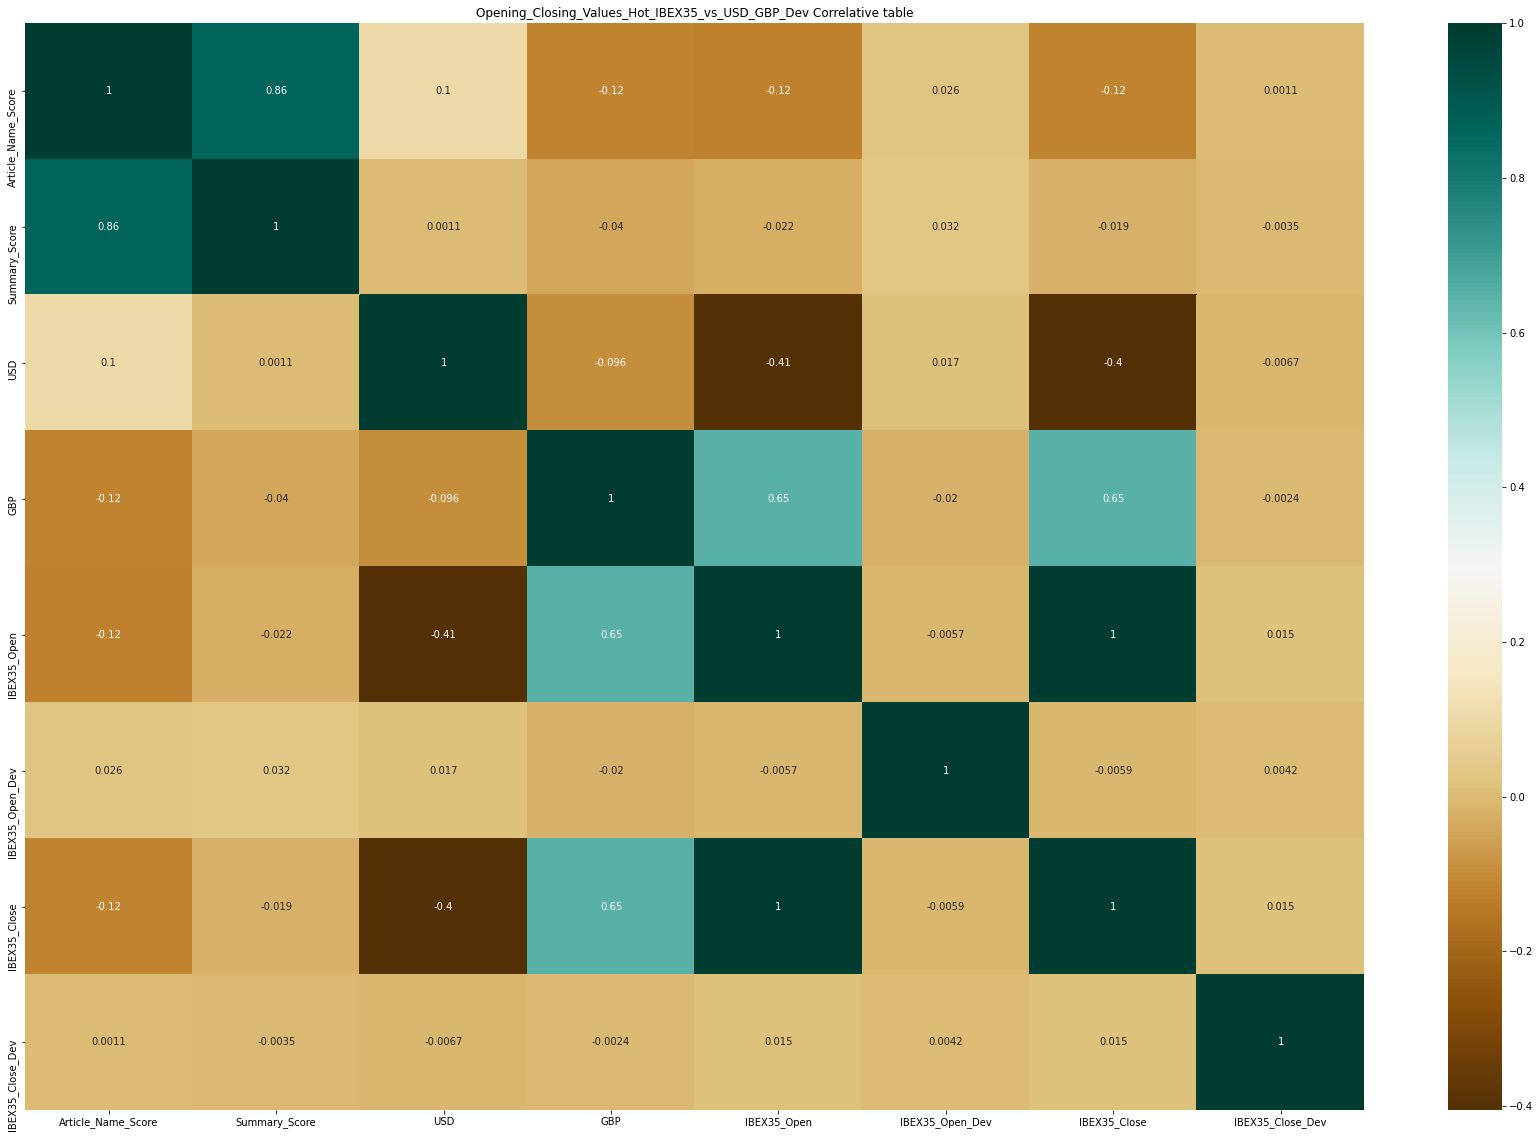

In [7]:
index_key = ["IBEX35"]
divisa_interest = ["USD","GBP"]

markers_dev = mnd.markers_maker("Closing_Values_Hot_IBEX35_vs_USD_GBP", index_key, ["Open","Open_Dev", "Close","Close_Dev"] , divisa_interest)
hot_dev = pd.concat([hot_wiki_df, markers_dev], axis=1 , join = "inner")
vt.corr_table_not_filtered(hot_dev,"Opening_Closing_Values_Hot_IBEX35_vs_USD_GBP_Dev")